In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.model_selection import train_test_split
%matplotlib inline

# Exercise 3 - Logistic Regression


In [2]:
# load data
data = np.genfromtxt("data.csv", delimiter=",")
X = data[:,0:2]
Y = np.expand_dims(data[:,2], axis=1)

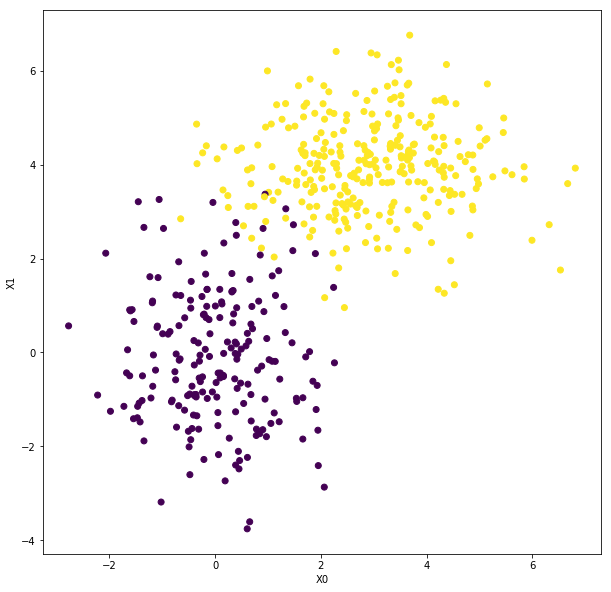

In [3]:
# plot
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], c=Y.flatten())
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [4]:
intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)

In [5]:
print(X.shape)
print(Y.shape)

(500, 3)
(500, 1)


In [6]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=0)

In [7]:
print(X_train.shape, Y_train.shape)

(375, 3) (375, 1)


In [8]:
class LogisticRegression:
    def __init__(self):
        self.loss_train = [np.inf]
        self.loss_valid = [np.inf]
        self.acc_train = [0.0]
        self.acc_valid = [0.0]
    
    def sigmoid(self, X, Theta):
        z = np.dot(X, Theta)
        return 1 / (1 + np.exp(-z))
    
    def loss(self, Y_true, Y_pred):
        return (np.multiply(-Y_true, np.log(Y_pred)) - np.multiply((1 - Y_true),np.log(1 - Y_pred))).mean()
    
    def grad(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
    
    def update(self, theta, lr, g):
        return theta - lr * g
    
    def accuracy(self, Y_true, Y_pred):
        return np.sum(Y_true == np.around(Y_pred)) / Y_true.shape[0]

    def fit(self, X_train, Y_train, X_valid, Y_valid, maxiter=1000, lr=0.1, tol=1e-6, verbose=True):
        theta = np.zeros((X_train.shape[1], 1))
        start = timer()
        for i in range(maxiter):
            h = self.sigmoid(X_train, theta)
            g = self.grad(X_train, h, Y_train)
            theta = self.update(theta, lr, g)
            
            Y_train_pred = self.sigmoid(X_train, theta)
            Y_valid_pred = self.sigmoid(X_valid, theta)
            self.loss_train.append(self.loss(Y_train, Y_train_pred))
            self.loss_valid.append(self.loss(Y_valid, Y_valid_pred))
            self.acc_train.append(self.accuracy(Y_train, Y_train_pred))
            self.acc_valid.append(self.accuracy(Y_valid, Y_valid_pred))
            if verbose:
                line = "It.{:6d} - lr: {:6.4f} - Loss: {:6.5f}, Loss_valid: {:6.5f} Acc: {:.3f} % Acc_valid: {:.3f} %" 
                print(line.format(i, lr,
                                  self.loss_train[-1],
                                  self.loss_valid[-1],
                                  self.acc_train[-1] * 100,
                                  self.acc_valid[-1] * 100))
            if np.abs(self.loss_valid[-2] - self.loss_valid[-1]) < tol:
                print(self.loss_valid[-1], self.loss_valid[-1])
                print("break")
                break
        elapsed = timer() - start
        result = {"theta": theta,
                  "elapsed": elapsed}
        return result

    def predict(self, X, theta):
        result = self.sigmoid(X, theta)
        return np.around(result) 

In [9]:
lr = LogisticRegression()
result = lr.fit(X_train, Y_train, X_valid, Y_valid, 10, 0.1, 1e-4, True)

It.     0 - lr: 0.1000 - Loss: 0.50268, Loss_valid: 0.53200 Acc: 82.667 % Acc_valid: 76.000 %
It.     1 - lr: 0.1000 - Loss: 0.42879, Loss_valid: 0.47074 Acc: 82.667 % Acc_valid: 76.800 %
It.     2 - lr: 0.1000 - Loss: 0.39183, Loss_valid: 0.44033 Acc: 82.667 % Acc_valid: 77.600 %
It.     3 - lr: 0.1000 - Loss: 0.36971, Loss_valid: 0.42207 Acc: 82.667 % Acc_valid: 78.400 %
It.     4 - lr: 0.1000 - Loss: 0.35484, Loss_valid: 0.40963 Acc: 82.667 % Acc_valid: 78.400 %
It.     5 - lr: 0.1000 - Loss: 0.34399, Loss_valid: 0.40038 Acc: 82.667 % Acc_valid: 78.400 %
It.     6 - lr: 0.1000 - Loss: 0.33560, Loss_valid: 0.39305 Acc: 82.933 % Acc_valid: 78.400 %
It.     7 - lr: 0.1000 - Loss: 0.32880, Loss_valid: 0.38696 Acc: 82.933 % Acc_valid: 80.000 %
It.     8 - lr: 0.1000 - Loss: 0.32310, Loss_valid: 0.38171 Acc: 82.933 % Acc_valid: 80.000 %
It.     9 - lr: 0.1000 - Loss: 0.31818, Loss_valid: 0.37705 Acc: 82.933 % Acc_valid: 80.000 %


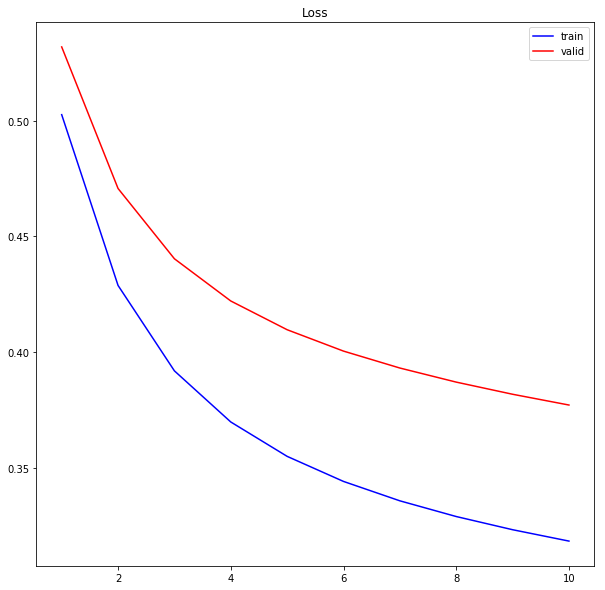

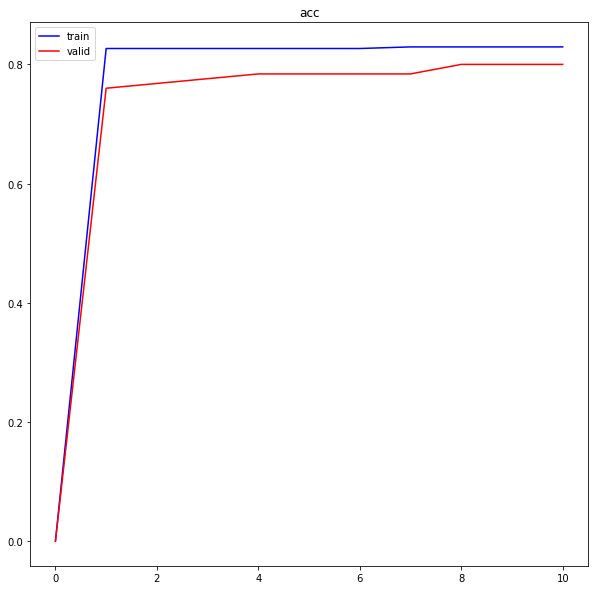

In [10]:
plt.figure(figsize=(10, 10))
xs = list(range(len(lr.loss_train)))
plt.plot(xs, lr.loss_train, label="train", color="b")
plt.plot(xs, lr.loss_valid, label="valid", color="r")
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
xs = list(range(len(lr.loss_train)))
plt.plot(xs, lr.acc_train, label="train", color="b")
plt.plot(xs, lr.acc_valid, label="valid", color="r")
plt.title("acc")
plt.legend()
plt.show()

In [11]:
Y_pred = lr.predict(X_train, result["theta"])
Y_pred_valid = lr.predict(X_valid, result["theta"])

In [12]:
X_mp = X_train[(Y_train != Y_pred).flatten()]

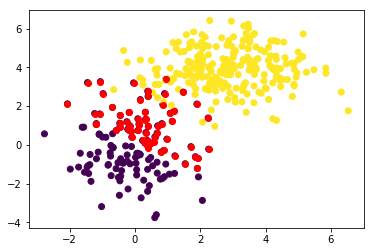

In [13]:
plt.scatter(X_train[:,1], X_train[:,2], c=Y_train.flatten())
plt.scatter(X_mp[:,1], X_mp[:, 2], c="r")
plt.show()

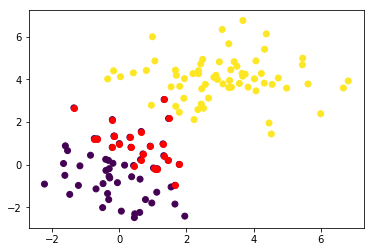

In [14]:
X_mp = X_valid[(Y_valid != Y_pred_valid).flatten()]
plt.scatter(X_valid[:,1], X_valid[:,2], c=Y_valid.flatten())
plt.scatter(X_mp[:,1], X_mp[:, 2], c="r")
plt.show()

# SPAM Classification
- https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [15]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
df = pd.read_csv('SMSSpamCollection', delimiter='\t',header=None)

In [17]:
Y, X = df[0], df[1]
Y = np.array(Y)
Y[Y == "ham"] = 0
Y[Y == "spam"] = 1
Y = Y.astype(np.int).reshape((Y.shape[0], 1))
X = np.array(X)
print("Y:", Y.shape)
print("X:", X.shape)

Y: (5572, 1)
X: (5572,)


In [18]:
Z = CountVectorizer().fit_transform(X).todense()

In [19]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).todense()

In [20]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=0)

In [21]:
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(4179, 8713)
(1393, 8713)
(4179, 1)
(1393, 1)


In [22]:
lr = LogisticRegression()
result = lr.fit(X_train, Y_train, X_valid, Y_valid, 10000, 0.1, 1e-10, True)

It.     0 - lr: 0.1000 - Loss: 0.69286, Loss_valid: 0.69286 Acc: 87.437 % Acc_valid: 87.437 %
It.     1 - lr: 0.1000 - Loss: 0.69257, Loss_valid: 0.69257 Acc: 87.437 % Acc_valid: 87.437 %
It.     2 - lr: 0.1000 - Loss: 0.69228, Loss_valid: 0.69228 Acc: 87.437 % Acc_valid: 87.437 %
It.     3 - lr: 0.1000 - Loss: 0.69199, Loss_valid: 0.69199 Acc: 87.437 % Acc_valid: 87.437 %
It.     4 - lr: 0.1000 - Loss: 0.69171, Loss_valid: 0.69171 Acc: 87.437 % Acc_valid: 87.437 %
It.     5 - lr: 0.1000 - Loss: 0.69142, Loss_valid: 0.69142 Acc: 87.437 % Acc_valid: 87.437 %
It.     6 - lr: 0.1000 - Loss: 0.69113, Loss_valid: 0.69113 Acc: 87.461 % Acc_valid: 87.437 %
It.     7 - lr: 0.1000 - Loss: 0.69084, Loss_valid: 0.69085 Acc: 87.461 % Acc_valid: 87.437 %
It.     8 - lr: 0.1000 - Loss: 0.69056, Loss_valid: 0.69056 Acc: 87.461 % Acc_valid: 87.437 %
It.     9 - lr: 0.1000 - Loss: 0.69027, Loss_valid: 0.69027 Acc: 87.461 % Acc_valid: 87.437 %
It.    10 - lr: 0.1000 - Loss: 0.68999, Loss_valid: 0.68999 

It.    89 - lr: 0.1000 - Loss: 0.66827, Loss_valid: 0.66830 Acc: 87.461 % Acc_valid: 87.437 %
It.    90 - lr: 0.1000 - Loss: 0.66801, Loss_valid: 0.66803 Acc: 87.461 % Acc_valid: 87.437 %
It.    91 - lr: 0.1000 - Loss: 0.66775, Loss_valid: 0.66777 Acc: 87.461 % Acc_valid: 87.437 %
It.    92 - lr: 0.1000 - Loss: 0.66748, Loss_valid: 0.66751 Acc: 87.461 % Acc_valid: 87.437 %
It.    93 - lr: 0.1000 - Loss: 0.66722, Loss_valid: 0.66725 Acc: 87.461 % Acc_valid: 87.437 %
It.    94 - lr: 0.1000 - Loss: 0.66696, Loss_valid: 0.66698 Acc: 87.461 % Acc_valid: 87.437 %
It.    95 - lr: 0.1000 - Loss: 0.66669, Loss_valid: 0.66672 Acc: 87.461 % Acc_valid: 87.437 %
It.    96 - lr: 0.1000 - Loss: 0.66643, Loss_valid: 0.66646 Acc: 87.461 % Acc_valid: 87.437 %
It.    97 - lr: 0.1000 - Loss: 0.66617, Loss_valid: 0.66620 Acc: 87.461 % Acc_valid: 87.437 %
It.    98 - lr: 0.1000 - Loss: 0.66591, Loss_valid: 0.66593 Acc: 87.461 % Acc_valid: 87.437 %
It.    99 - lr: 0.1000 - Loss: 0.66564, Loss_valid: 0.66567 

It.   177 - lr: 0.1000 - Loss: 0.64601, Loss_valid: 0.64608 Acc: 87.676 % Acc_valid: 87.581 %
It.   178 - lr: 0.1000 - Loss: 0.64577, Loss_valid: 0.64584 Acc: 87.676 % Acc_valid: 87.581 %
It.   179 - lr: 0.1000 - Loss: 0.64552, Loss_valid: 0.64560 Acc: 87.676 % Acc_valid: 87.581 %
It.   180 - lr: 0.1000 - Loss: 0.64528, Loss_valid: 0.64535 Acc: 87.676 % Acc_valid: 87.581 %
It.   181 - lr: 0.1000 - Loss: 0.64504, Loss_valid: 0.64511 Acc: 87.676 % Acc_valid: 87.653 %
It.   182 - lr: 0.1000 - Loss: 0.64480, Loss_valid: 0.64487 Acc: 87.676 % Acc_valid: 87.653 %
It.   183 - lr: 0.1000 - Loss: 0.64456, Loss_valid: 0.64463 Acc: 87.676 % Acc_valid: 87.653 %
It.   184 - lr: 0.1000 - Loss: 0.64432, Loss_valid: 0.64439 Acc: 87.676 % Acc_valid: 87.653 %
It.   185 - lr: 0.1000 - Loss: 0.64408, Loss_valid: 0.64415 Acc: 87.676 % Acc_valid: 87.653 %
It.   186 - lr: 0.1000 - Loss: 0.64384, Loss_valid: 0.64391 Acc: 87.676 % Acc_valid: 87.653 %
It.   187 - lr: 0.1000 - Loss: 0.64360, Loss_valid: 0.64367 

It.   269 - lr: 0.1000 - Loss: 0.62469, Loss_valid: 0.62483 Acc: 87.724 % Acc_valid: 87.653 %
It.   270 - lr: 0.1000 - Loss: 0.62446, Loss_valid: 0.62460 Acc: 87.724 % Acc_valid: 87.653 %
It.   271 - lr: 0.1000 - Loss: 0.62424, Loss_valid: 0.62438 Acc: 87.724 % Acc_valid: 87.653 %
It.   272 - lr: 0.1000 - Loss: 0.62402, Loss_valid: 0.62416 Acc: 87.724 % Acc_valid: 87.653 %
It.   273 - lr: 0.1000 - Loss: 0.62380, Loss_valid: 0.62394 Acc: 87.724 % Acc_valid: 87.653 %
It.   274 - lr: 0.1000 - Loss: 0.62358, Loss_valid: 0.62372 Acc: 87.724 % Acc_valid: 87.653 %
It.   275 - lr: 0.1000 - Loss: 0.62336, Loss_valid: 0.62350 Acc: 87.724 % Acc_valid: 87.653 %
It.   276 - lr: 0.1000 - Loss: 0.62314, Loss_valid: 0.62328 Acc: 87.724 % Acc_valid: 87.653 %
It.   277 - lr: 0.1000 - Loss: 0.62292, Loss_valid: 0.62307 Acc: 87.724 % Acc_valid: 87.653 %
It.   278 - lr: 0.1000 - Loss: 0.62270, Loss_valid: 0.62285 Acc: 87.724 % Acc_valid: 87.653 %
It.   279 - lr: 0.1000 - Loss: 0.62248, Loss_valid: 0.62263 

It.   359 - lr: 0.1000 - Loss: 0.60556, Loss_valid: 0.60579 Acc: 87.748 % Acc_valid: 87.724 %
It.   360 - lr: 0.1000 - Loss: 0.60536, Loss_valid: 0.60559 Acc: 87.748 % Acc_valid: 87.724 %
It.   361 - lr: 0.1000 - Loss: 0.60516, Loss_valid: 0.60538 Acc: 87.748 % Acc_valid: 87.724 %
It.   362 - lr: 0.1000 - Loss: 0.60495, Loss_valid: 0.60518 Acc: 87.748 % Acc_valid: 87.724 %
It.   363 - lr: 0.1000 - Loss: 0.60475, Loss_valid: 0.60498 Acc: 87.748 % Acc_valid: 87.724 %
It.   364 - lr: 0.1000 - Loss: 0.60455, Loss_valid: 0.60478 Acc: 87.748 % Acc_valid: 87.724 %
It.   365 - lr: 0.1000 - Loss: 0.60435, Loss_valid: 0.60458 Acc: 87.748 % Acc_valid: 87.724 %
It.   366 - lr: 0.1000 - Loss: 0.60414, Loss_valid: 0.60438 Acc: 87.748 % Acc_valid: 87.724 %
It.   367 - lr: 0.1000 - Loss: 0.60394, Loss_valid: 0.60417 Acc: 87.748 % Acc_valid: 87.724 %
It.   368 - lr: 0.1000 - Loss: 0.60374, Loss_valid: 0.60397 Acc: 87.748 % Acc_valid: 87.724 %
It.   369 - lr: 0.1000 - Loss: 0.60354, Loss_valid: 0.60377 

It.   447 - lr: 0.1000 - Loss: 0.58836, Loss_valid: 0.58868 Acc: 87.796 % Acc_valid: 87.724 %
It.   448 - lr: 0.1000 - Loss: 0.58817, Loss_valid: 0.58849 Acc: 87.796 % Acc_valid: 87.724 %
It.   449 - lr: 0.1000 - Loss: 0.58798, Loss_valid: 0.58831 Acc: 87.796 % Acc_valid: 87.724 %
It.   450 - lr: 0.1000 - Loss: 0.58780, Loss_valid: 0.58812 Acc: 87.796 % Acc_valid: 87.724 %
It.   451 - lr: 0.1000 - Loss: 0.58761, Loss_valid: 0.58793 Acc: 87.796 % Acc_valid: 87.724 %
It.   452 - lr: 0.1000 - Loss: 0.58742, Loss_valid: 0.58775 Acc: 87.796 % Acc_valid: 87.724 %
It.   453 - lr: 0.1000 - Loss: 0.58724, Loss_valid: 0.58756 Acc: 87.796 % Acc_valid: 87.724 %
It.   454 - lr: 0.1000 - Loss: 0.58705, Loss_valid: 0.58738 Acc: 87.796 % Acc_valid: 87.724 %
It.   455 - lr: 0.1000 - Loss: 0.58686, Loss_valid: 0.58719 Acc: 87.796 % Acc_valid: 87.724 %
It.   456 - lr: 0.1000 - Loss: 0.58668, Loss_valid: 0.58701 Acc: 87.796 % Acc_valid: 87.724 %
It.   457 - lr: 0.1000 - Loss: 0.58649, Loss_valid: 0.58682 

It.   540 - lr: 0.1000 - Loss: 0.57161, Loss_valid: 0.57204 Acc: 87.844 % Acc_valid: 87.796 %
It.   541 - lr: 0.1000 - Loss: 0.57144, Loss_valid: 0.57187 Acc: 87.844 % Acc_valid: 87.796 %
It.   542 - lr: 0.1000 - Loss: 0.57126, Loss_valid: 0.57170 Acc: 87.844 % Acc_valid: 87.796 %
It.   543 - lr: 0.1000 - Loss: 0.57109, Loss_valid: 0.57153 Acc: 87.844 % Acc_valid: 87.796 %
It.   544 - lr: 0.1000 - Loss: 0.57092, Loss_valid: 0.57136 Acc: 87.844 % Acc_valid: 87.796 %
It.   545 - lr: 0.1000 - Loss: 0.57075, Loss_valid: 0.57119 Acc: 87.844 % Acc_valid: 87.796 %
It.   546 - lr: 0.1000 - Loss: 0.57058, Loss_valid: 0.57102 Acc: 87.844 % Acc_valid: 87.796 %
It.   547 - lr: 0.1000 - Loss: 0.57040, Loss_valid: 0.57085 Acc: 87.844 % Acc_valid: 87.796 %
It.   548 - lr: 0.1000 - Loss: 0.57023, Loss_valid: 0.57068 Acc: 87.844 % Acc_valid: 87.796 %
It.   549 - lr: 0.1000 - Loss: 0.57006, Loss_valid: 0.57051 Acc: 87.844 % Acc_valid: 87.796 %
It.   550 - lr: 0.1000 - Loss: 0.56989, Loss_valid: 0.57034 

It.   629 - lr: 0.1000 - Loss: 0.55682, Loss_valid: 0.55737 Acc: 87.940 % Acc_valid: 87.796 %
It.   630 - lr: 0.1000 - Loss: 0.55666, Loss_valid: 0.55721 Acc: 87.940 % Acc_valid: 87.796 %
It.   631 - lr: 0.1000 - Loss: 0.55650, Loss_valid: 0.55705 Acc: 87.940 % Acc_valid: 87.796 %
It.   632 - lr: 0.1000 - Loss: 0.55634, Loss_valid: 0.55690 Acc: 87.940 % Acc_valid: 87.796 %
It.   633 - lr: 0.1000 - Loss: 0.55618, Loss_valid: 0.55674 Acc: 87.940 % Acc_valid: 87.796 %
It.   634 - lr: 0.1000 - Loss: 0.55602, Loss_valid: 0.55658 Acc: 87.940 % Acc_valid: 87.796 %
It.   635 - lr: 0.1000 - Loss: 0.55586, Loss_valid: 0.55642 Acc: 87.940 % Acc_valid: 87.796 %
It.   636 - lr: 0.1000 - Loss: 0.55570, Loss_valid: 0.55626 Acc: 87.940 % Acc_valid: 87.796 %
It.   637 - lr: 0.1000 - Loss: 0.55554, Loss_valid: 0.55611 Acc: 87.940 % Acc_valid: 87.796 %
It.   638 - lr: 0.1000 - Loss: 0.55538, Loss_valid: 0.55595 Acc: 87.940 % Acc_valid: 87.796 %
It.   639 - lr: 0.1000 - Loss: 0.55523, Loss_valid: 0.55579 

It.   720 - lr: 0.1000 - Loss: 0.54281, Loss_valid: 0.54349 Acc: 87.940 % Acc_valid: 87.868 %
It.   721 - lr: 0.1000 - Loss: 0.54267, Loss_valid: 0.54335 Acc: 87.940 % Acc_valid: 87.868 %
It.   722 - lr: 0.1000 - Loss: 0.54252, Loss_valid: 0.54320 Acc: 87.940 % Acc_valid: 87.868 %
It.   723 - lr: 0.1000 - Loss: 0.54237, Loss_valid: 0.54306 Acc: 87.940 % Acc_valid: 87.868 %
It.   724 - lr: 0.1000 - Loss: 0.54222, Loss_valid: 0.54291 Acc: 87.940 % Acc_valid: 87.868 %
It.   725 - lr: 0.1000 - Loss: 0.54207, Loss_valid: 0.54276 Acc: 87.940 % Acc_valid: 87.868 %
It.   726 - lr: 0.1000 - Loss: 0.54193, Loss_valid: 0.54262 Acc: 87.940 % Acc_valid: 87.868 %
It.   727 - lr: 0.1000 - Loss: 0.54178, Loss_valid: 0.54247 Acc: 87.940 % Acc_valid: 87.868 %
It.   728 - lr: 0.1000 - Loss: 0.54163, Loss_valid: 0.54233 Acc: 87.940 % Acc_valid: 87.868 %
It.   729 - lr: 0.1000 - Loss: 0.54149, Loss_valid: 0.54218 Acc: 87.940 % Acc_valid: 87.868 %
It.   730 - lr: 0.1000 - Loss: 0.54134, Loss_valid: 0.54203 

It.   809 - lr: 0.1000 - Loss: 0.53010, Loss_valid: 0.53091 Acc: 88.035 % Acc_valid: 87.940 %
It.   810 - lr: 0.1000 - Loss: 0.52996, Loss_valid: 0.53078 Acc: 88.035 % Acc_valid: 87.940 %
It.   811 - lr: 0.1000 - Loss: 0.52983, Loss_valid: 0.53064 Acc: 88.035 % Acc_valid: 87.940 %
It.   812 - lr: 0.1000 - Loss: 0.52969, Loss_valid: 0.53051 Acc: 88.035 % Acc_valid: 87.940 %
It.   813 - lr: 0.1000 - Loss: 0.52955, Loss_valid: 0.53037 Acc: 88.035 % Acc_valid: 87.940 %
It.   814 - lr: 0.1000 - Loss: 0.52941, Loss_valid: 0.53023 Acc: 88.035 % Acc_valid: 87.940 %
It.   815 - lr: 0.1000 - Loss: 0.52928, Loss_valid: 0.53010 Acc: 88.035 % Acc_valid: 87.940 %
It.   816 - lr: 0.1000 - Loss: 0.52914, Loss_valid: 0.52996 Acc: 88.035 % Acc_valid: 87.940 %
It.   817 - lr: 0.1000 - Loss: 0.52900, Loss_valid: 0.52983 Acc: 88.035 % Acc_valid: 87.940 %
It.   818 - lr: 0.1000 - Loss: 0.52887, Loss_valid: 0.52969 Acc: 88.035 % Acc_valid: 87.940 %
It.   819 - lr: 0.1000 - Loss: 0.52873, Loss_valid: 0.52956 

It.   899 - lr: 0.1000 - Loss: 0.51813, Loss_valid: 0.51909 Acc: 88.107 % Acc_valid: 87.940 %
It.   900 - lr: 0.1000 - Loss: 0.51801, Loss_valid: 0.51896 Acc: 88.107 % Acc_valid: 88.011 %
It.   901 - lr: 0.1000 - Loss: 0.51788, Loss_valid: 0.51883 Acc: 88.107 % Acc_valid: 88.011 %
It.   902 - lr: 0.1000 - Loss: 0.51775, Loss_valid: 0.51871 Acc: 88.107 % Acc_valid: 88.011 %
It.   903 - lr: 0.1000 - Loss: 0.51762, Loss_valid: 0.51858 Acc: 88.107 % Acc_valid: 88.011 %
It.   904 - lr: 0.1000 - Loss: 0.51749, Loss_valid: 0.51845 Acc: 88.107 % Acc_valid: 88.011 %
It.   905 - lr: 0.1000 - Loss: 0.51737, Loss_valid: 0.51833 Acc: 88.107 % Acc_valid: 88.011 %
It.   906 - lr: 0.1000 - Loss: 0.51724, Loss_valid: 0.51820 Acc: 88.107 % Acc_valid: 88.011 %
It.   907 - lr: 0.1000 - Loss: 0.51711, Loss_valid: 0.51807 Acc: 88.107 % Acc_valid: 88.011 %
It.   908 - lr: 0.1000 - Loss: 0.51698, Loss_valid: 0.51795 Acc: 88.107 % Acc_valid: 88.011 %
It.   909 - lr: 0.1000 - Loss: 0.51686, Loss_valid: 0.51782 

It.   989 - lr: 0.1000 - Loss: 0.50697, Loss_valid: 0.50807 Acc: 88.131 % Acc_valid: 88.011 %
It.   990 - lr: 0.1000 - Loss: 0.50685, Loss_valid: 0.50795 Acc: 88.155 % Acc_valid: 88.011 %
It.   991 - lr: 0.1000 - Loss: 0.50673, Loss_valid: 0.50783 Acc: 88.155 % Acc_valid: 88.011 %
It.   992 - lr: 0.1000 - Loss: 0.50661, Loss_valid: 0.50771 Acc: 88.179 % Acc_valid: 88.011 %
It.   993 - lr: 0.1000 - Loss: 0.50649, Loss_valid: 0.50759 Acc: 88.179 % Acc_valid: 88.011 %
It.   994 - lr: 0.1000 - Loss: 0.50637, Loss_valid: 0.50748 Acc: 88.179 % Acc_valid: 88.011 %
It.   995 - lr: 0.1000 - Loss: 0.50625, Loss_valid: 0.50736 Acc: 88.179 % Acc_valid: 88.011 %
It.   996 - lr: 0.1000 - Loss: 0.50613, Loss_valid: 0.50724 Acc: 88.179 % Acc_valid: 88.011 %
It.   997 - lr: 0.1000 - Loss: 0.50602, Loss_valid: 0.50712 Acc: 88.179 % Acc_valid: 88.011 %
It.   998 - lr: 0.1000 - Loss: 0.50590, Loss_valid: 0.50701 Acc: 88.179 % Acc_valid: 88.011 %
It.   999 - lr: 0.1000 - Loss: 0.50578, Loss_valid: 0.50689 

It.  1079 - lr: 0.1000 - Loss: 0.49654, Loss_valid: 0.49778 Acc: 88.251 % Acc_valid: 88.011 %
It.  1080 - lr: 0.1000 - Loss: 0.49642, Loss_valid: 0.49767 Acc: 88.251 % Acc_valid: 88.011 %
It.  1081 - lr: 0.1000 - Loss: 0.49631, Loss_valid: 0.49755 Acc: 88.251 % Acc_valid: 88.011 %
It.  1082 - lr: 0.1000 - Loss: 0.49620, Loss_valid: 0.49744 Acc: 88.251 % Acc_valid: 88.011 %
It.  1083 - lr: 0.1000 - Loss: 0.49609, Loss_valid: 0.49733 Acc: 88.251 % Acc_valid: 88.011 %
It.  1084 - lr: 0.1000 - Loss: 0.49598, Loss_valid: 0.49722 Acc: 88.251 % Acc_valid: 88.011 %
It.  1085 - lr: 0.1000 - Loss: 0.49586, Loss_valid: 0.49711 Acc: 88.275 % Acc_valid: 88.011 %
It.  1086 - lr: 0.1000 - Loss: 0.49575, Loss_valid: 0.49700 Acc: 88.275 % Acc_valid: 88.011 %
It.  1087 - lr: 0.1000 - Loss: 0.49564, Loss_valid: 0.49689 Acc: 88.275 % Acc_valid: 88.011 %
It.  1088 - lr: 0.1000 - Loss: 0.49553, Loss_valid: 0.49678 Acc: 88.275 % Acc_valid: 88.011 %
It.  1089 - lr: 0.1000 - Loss: 0.49542, Loss_valid: 0.49667 

It.  1169 - lr: 0.1000 - Loss: 0.48676, Loss_valid: 0.48814 Acc: 88.323 % Acc_valid: 88.011 %
It.  1170 - lr: 0.1000 - Loss: 0.48665, Loss_valid: 0.48804 Acc: 88.323 % Acc_valid: 88.011 %
It.  1171 - lr: 0.1000 - Loss: 0.48655, Loss_valid: 0.48794 Acc: 88.346 % Acc_valid: 88.011 %
It.  1172 - lr: 0.1000 - Loss: 0.48644, Loss_valid: 0.48783 Acc: 88.346 % Acc_valid: 88.011 %
It.  1173 - lr: 0.1000 - Loss: 0.48634, Loss_valid: 0.48773 Acc: 88.346 % Acc_valid: 88.011 %
It.  1174 - lr: 0.1000 - Loss: 0.48623, Loss_valid: 0.48763 Acc: 88.346 % Acc_valid: 88.011 %
It.  1175 - lr: 0.1000 - Loss: 0.48613, Loss_valid: 0.48752 Acc: 88.346 % Acc_valid: 88.011 %
It.  1176 - lr: 0.1000 - Loss: 0.48602, Loss_valid: 0.48742 Acc: 88.346 % Acc_valid: 88.011 %
It.  1177 - lr: 0.1000 - Loss: 0.48592, Loss_valid: 0.48732 Acc: 88.346 % Acc_valid: 88.011 %
It.  1178 - lr: 0.1000 - Loss: 0.48581, Loss_valid: 0.48721 Acc: 88.346 % Acc_valid: 88.011 %
It.  1179 - lr: 0.1000 - Loss: 0.48571, Loss_valid: 0.48711 

It.  1259 - lr: 0.1000 - Loss: 0.47757, Loss_valid: 0.47911 Acc: 88.466 % Acc_valid: 88.227 %
It.  1260 - lr: 0.1000 - Loss: 0.47747, Loss_valid: 0.47901 Acc: 88.514 % Acc_valid: 88.227 %
It.  1261 - lr: 0.1000 - Loss: 0.47737, Loss_valid: 0.47891 Acc: 88.514 % Acc_valid: 88.227 %
It.  1262 - lr: 0.1000 - Loss: 0.47727, Loss_valid: 0.47881 Acc: 88.514 % Acc_valid: 88.227 %
It.  1263 - lr: 0.1000 - Loss: 0.47717, Loss_valid: 0.47872 Acc: 88.514 % Acc_valid: 88.227 %
It.  1264 - lr: 0.1000 - Loss: 0.47708, Loss_valid: 0.47862 Acc: 88.514 % Acc_valid: 88.227 %
It.  1265 - lr: 0.1000 - Loss: 0.47698, Loss_valid: 0.47852 Acc: 88.514 % Acc_valid: 88.227 %
It.  1266 - lr: 0.1000 - Loss: 0.47688, Loss_valid: 0.47843 Acc: 88.514 % Acc_valid: 88.227 %
It.  1267 - lr: 0.1000 - Loss: 0.47678, Loss_valid: 0.47833 Acc: 88.514 % Acc_valid: 88.227 %
It.  1268 - lr: 0.1000 - Loss: 0.47668, Loss_valid: 0.47823 Acc: 88.514 % Acc_valid: 88.227 %
It.  1269 - lr: 0.1000 - Loss: 0.47658, Loss_valid: 0.47814 

It.  1349 - lr: 0.1000 - Loss: 0.46892, Loss_valid: 0.47061 Acc: 88.586 % Acc_valid: 88.442 %
It.  1350 - lr: 0.1000 - Loss: 0.46883, Loss_valid: 0.47052 Acc: 88.586 % Acc_valid: 88.442 %
It.  1351 - lr: 0.1000 - Loss: 0.46874, Loss_valid: 0.47043 Acc: 88.586 % Acc_valid: 88.442 %
It.  1352 - lr: 0.1000 - Loss: 0.46864, Loss_valid: 0.47033 Acc: 88.586 % Acc_valid: 88.442 %
It.  1353 - lr: 0.1000 - Loss: 0.46855, Loss_valid: 0.47024 Acc: 88.586 % Acc_valid: 88.442 %
It.  1354 - lr: 0.1000 - Loss: 0.46846, Loss_valid: 0.47015 Acc: 88.586 % Acc_valid: 88.442 %
It.  1355 - lr: 0.1000 - Loss: 0.46836, Loss_valid: 0.47006 Acc: 88.586 % Acc_valid: 88.442 %
It.  1356 - lr: 0.1000 - Loss: 0.46827, Loss_valid: 0.46997 Acc: 88.586 % Acc_valid: 88.442 %
It.  1357 - lr: 0.1000 - Loss: 0.46818, Loss_valid: 0.46988 Acc: 88.586 % Acc_valid: 88.442 %
It.  1358 - lr: 0.1000 - Loss: 0.46809, Loss_valid: 0.46979 Acc: 88.586 % Acc_valid: 88.442 %
It.  1359 - lr: 0.1000 - Loss: 0.46799, Loss_valid: 0.46970 

It.  1439 - lr: 0.1000 - Loss: 0.46077, Loss_valid: 0.46260 Acc: 88.849 % Acc_valid: 88.586 %
It.  1440 - lr: 0.1000 - Loss: 0.46068, Loss_valid: 0.46252 Acc: 88.849 % Acc_valid: 88.586 %
It.  1441 - lr: 0.1000 - Loss: 0.46059, Loss_valid: 0.46243 Acc: 88.849 % Acc_valid: 88.586 %
It.  1442 - lr: 0.1000 - Loss: 0.46050, Loss_valid: 0.46234 Acc: 88.849 % Acc_valid: 88.586 %
It.  1443 - lr: 0.1000 - Loss: 0.46041, Loss_valid: 0.46226 Acc: 88.849 % Acc_valid: 88.586 %
It.  1444 - lr: 0.1000 - Loss: 0.46033, Loss_valid: 0.46217 Acc: 88.849 % Acc_valid: 88.586 %
It.  1445 - lr: 0.1000 - Loss: 0.46024, Loss_valid: 0.46208 Acc: 88.849 % Acc_valid: 88.586 %
It.  1446 - lr: 0.1000 - Loss: 0.46015, Loss_valid: 0.46200 Acc: 88.849 % Acc_valid: 88.586 %
It.  1447 - lr: 0.1000 - Loss: 0.46006, Loss_valid: 0.46191 Acc: 88.849 % Acc_valid: 88.586 %
It.  1448 - lr: 0.1000 - Loss: 0.45998, Loss_valid: 0.46183 Acc: 88.849 % Acc_valid: 88.586 %
It.  1449 - lr: 0.1000 - Loss: 0.45989, Loss_valid: 0.46174 

It.  1529 - lr: 0.1000 - Loss: 0.45306, Loss_valid: 0.45504 Acc: 88.993 % Acc_valid: 88.729 %
It.  1530 - lr: 0.1000 - Loss: 0.45297, Loss_valid: 0.45496 Acc: 88.993 % Acc_valid: 88.729 %
It.  1531 - lr: 0.1000 - Loss: 0.45289, Loss_valid: 0.45488 Acc: 88.993 % Acc_valid: 88.729 %
It.  1532 - lr: 0.1000 - Loss: 0.45281, Loss_valid: 0.45480 Acc: 88.993 % Acc_valid: 88.729 %
It.  1533 - lr: 0.1000 - Loss: 0.45272, Loss_valid: 0.45472 Acc: 88.993 % Acc_valid: 88.729 %
It.  1534 - lr: 0.1000 - Loss: 0.45264, Loss_valid: 0.45463 Acc: 88.993 % Acc_valid: 88.729 %
It.  1535 - lr: 0.1000 - Loss: 0.45256, Loss_valid: 0.45455 Acc: 88.993 % Acc_valid: 88.729 %
It.  1536 - lr: 0.1000 - Loss: 0.45247, Loss_valid: 0.45447 Acc: 88.993 % Acc_valid: 88.729 %
It.  1537 - lr: 0.1000 - Loss: 0.45239, Loss_valid: 0.45439 Acc: 88.993 % Acc_valid: 88.729 %
It.  1538 - lr: 0.1000 - Loss: 0.45231, Loss_valid: 0.45431 Acc: 88.993 % Acc_valid: 88.729 %
It.  1539 - lr: 0.1000 - Loss: 0.45222, Loss_valid: 0.45423 

It.  1619 - lr: 0.1000 - Loss: 0.44575, Loss_valid: 0.44789 Acc: 89.064 % Acc_valid: 88.873 %
It.  1620 - lr: 0.1000 - Loss: 0.44567, Loss_valid: 0.44781 Acc: 89.064 % Acc_valid: 88.873 %
It.  1621 - lr: 0.1000 - Loss: 0.44560, Loss_valid: 0.44773 Acc: 89.064 % Acc_valid: 88.873 %
It.  1622 - lr: 0.1000 - Loss: 0.44552, Loss_valid: 0.44766 Acc: 89.064 % Acc_valid: 88.873 %
It.  1623 - lr: 0.1000 - Loss: 0.44544, Loss_valid: 0.44758 Acc: 89.064 % Acc_valid: 88.873 %
It.  1624 - lr: 0.1000 - Loss: 0.44536, Loss_valid: 0.44750 Acc: 89.064 % Acc_valid: 88.873 %
It.  1625 - lr: 0.1000 - Loss: 0.44528, Loss_valid: 0.44743 Acc: 89.064 % Acc_valid: 88.873 %
It.  1626 - lr: 0.1000 - Loss: 0.44520, Loss_valid: 0.44735 Acc: 89.064 % Acc_valid: 88.873 %
It.  1627 - lr: 0.1000 - Loss: 0.44512, Loss_valid: 0.44727 Acc: 89.064 % Acc_valid: 88.873 %
It.  1628 - lr: 0.1000 - Loss: 0.44504, Loss_valid: 0.44719 Acc: 89.064 % Acc_valid: 88.873 %
It.  1629 - lr: 0.1000 - Loss: 0.44497, Loss_valid: 0.44712 

It.  1709 - lr: 0.1000 - Loss: 0.43882, Loss_valid: 0.44111 Acc: 89.112 % Acc_valid: 88.873 %
It.  1710 - lr: 0.1000 - Loss: 0.43875, Loss_valid: 0.44104 Acc: 89.112 % Acc_valid: 88.873 %
It.  1711 - lr: 0.1000 - Loss: 0.43867, Loss_valid: 0.44096 Acc: 89.112 % Acc_valid: 88.873 %
It.  1712 - lr: 0.1000 - Loss: 0.43860, Loss_valid: 0.44089 Acc: 89.112 % Acc_valid: 88.873 %
It.  1713 - lr: 0.1000 - Loss: 0.43852, Loss_valid: 0.44082 Acc: 89.112 % Acc_valid: 88.873 %
It.  1714 - lr: 0.1000 - Loss: 0.43845, Loss_valid: 0.44074 Acc: 89.112 % Acc_valid: 88.873 %
It.  1715 - lr: 0.1000 - Loss: 0.43837, Loss_valid: 0.44067 Acc: 89.112 % Acc_valid: 88.873 %
It.  1716 - lr: 0.1000 - Loss: 0.43830, Loss_valid: 0.44060 Acc: 89.112 % Acc_valid: 88.873 %
It.  1717 - lr: 0.1000 - Loss: 0.43823, Loss_valid: 0.44052 Acc: 89.112 % Acc_valid: 88.873 %
It.  1718 - lr: 0.1000 - Loss: 0.43815, Loss_valid: 0.44045 Acc: 89.112 % Acc_valid: 88.873 %
It.  1719 - lr: 0.1000 - Loss: 0.43808, Loss_valid: 0.44038 

It.  1799 - lr: 0.1000 - Loss: 0.43224, Loss_valid: 0.43467 Acc: 89.112 % Acc_valid: 88.945 %
It.  1800 - lr: 0.1000 - Loss: 0.43217, Loss_valid: 0.43460 Acc: 89.112 % Acc_valid: 88.945 %
It.  1801 - lr: 0.1000 - Loss: 0.43210, Loss_valid: 0.43453 Acc: 89.112 % Acc_valid: 88.945 %
It.  1802 - lr: 0.1000 - Loss: 0.43202, Loss_valid: 0.43446 Acc: 89.136 % Acc_valid: 89.017 %
It.  1803 - lr: 0.1000 - Loss: 0.43195, Loss_valid: 0.43439 Acc: 89.136 % Acc_valid: 89.017 %
It.  1804 - lr: 0.1000 - Loss: 0.43188, Loss_valid: 0.43432 Acc: 89.136 % Acc_valid: 89.017 %
It.  1805 - lr: 0.1000 - Loss: 0.43181, Loss_valid: 0.43425 Acc: 89.136 % Acc_valid: 89.017 %
It.  1806 - lr: 0.1000 - Loss: 0.43174, Loss_valid: 0.43418 Acc: 89.136 % Acc_valid: 89.017 %
It.  1807 - lr: 0.1000 - Loss: 0.43167, Loss_valid: 0.43411 Acc: 89.136 % Acc_valid: 89.017 %
It.  1808 - lr: 0.1000 - Loss: 0.43160, Loss_valid: 0.43404 Acc: 89.136 % Acc_valid: 89.017 %
It.  1809 - lr: 0.1000 - Loss: 0.43153, Loss_valid: 0.43397 

It.  1889 - lr: 0.1000 - Loss: 0.42597, Loss_valid: 0.42855 Acc: 89.304 % Acc_valid: 89.017 %
It.  1890 - lr: 0.1000 - Loss: 0.42590, Loss_valid: 0.42848 Acc: 89.304 % Acc_valid: 89.017 %
It.  1891 - lr: 0.1000 - Loss: 0.42583, Loss_valid: 0.42841 Acc: 89.304 % Acc_valid: 89.017 %
It.  1892 - lr: 0.1000 - Loss: 0.42576, Loss_valid: 0.42835 Acc: 89.304 % Acc_valid: 89.017 %
It.  1893 - lr: 0.1000 - Loss: 0.42569, Loss_valid: 0.42828 Acc: 89.304 % Acc_valid: 89.017 %
It.  1894 - lr: 0.1000 - Loss: 0.42563, Loss_valid: 0.42821 Acc: 89.304 % Acc_valid: 89.017 %
It.  1895 - lr: 0.1000 - Loss: 0.42556, Loss_valid: 0.42815 Acc: 89.304 % Acc_valid: 89.017 %
It.  1896 - lr: 0.1000 - Loss: 0.42549, Loss_valid: 0.42808 Acc: 89.304 % Acc_valid: 89.017 %
It.  1897 - lr: 0.1000 - Loss: 0.42542, Loss_valid: 0.42802 Acc: 89.304 % Acc_valid: 89.017 %
It.  1898 - lr: 0.1000 - Loss: 0.42536, Loss_valid: 0.42795 Acc: 89.328 % Acc_valid: 89.017 %
It.  1899 - lr: 0.1000 - Loss: 0.42529, Loss_valid: 0.42788 

It.  1979 - lr: 0.1000 - Loss: 0.41998, Loss_valid: 0.42271 Acc: 89.423 % Acc_valid: 89.304 %
It.  1980 - lr: 0.1000 - Loss: 0.41992, Loss_valid: 0.42265 Acc: 89.423 % Acc_valid: 89.304 %
It.  1981 - lr: 0.1000 - Loss: 0.41985, Loss_valid: 0.42258 Acc: 89.423 % Acc_valid: 89.304 %
It.  1982 - lr: 0.1000 - Loss: 0.41979, Loss_valid: 0.42252 Acc: 89.423 % Acc_valid: 89.304 %
It.  1983 - lr: 0.1000 - Loss: 0.41972, Loss_valid: 0.42246 Acc: 89.423 % Acc_valid: 89.304 %
It.  1984 - lr: 0.1000 - Loss: 0.41966, Loss_valid: 0.42239 Acc: 89.423 % Acc_valid: 89.304 %
It.  1985 - lr: 0.1000 - Loss: 0.41960, Loss_valid: 0.42233 Acc: 89.423 % Acc_valid: 89.304 %
It.  1986 - lr: 0.1000 - Loss: 0.41953, Loss_valid: 0.42227 Acc: 89.423 % Acc_valid: 89.304 %
It.  1987 - lr: 0.1000 - Loss: 0.41947, Loss_valid: 0.42220 Acc: 89.423 % Acc_valid: 89.304 %
It.  1988 - lr: 0.1000 - Loss: 0.41940, Loss_valid: 0.42214 Acc: 89.423 % Acc_valid: 89.304 %
It.  1989 - lr: 0.1000 - Loss: 0.41934, Loss_valid: 0.42208 

It.  2069 - lr: 0.1000 - Loss: 0.41427, Loss_valid: 0.41714 Acc: 89.447 % Acc_valid: 89.304 %
It.  2070 - lr: 0.1000 - Loss: 0.41421, Loss_valid: 0.41708 Acc: 89.447 % Acc_valid: 89.304 %
It.  2071 - lr: 0.1000 - Loss: 0.41415, Loss_valid: 0.41702 Acc: 89.447 % Acc_valid: 89.304 %
It.  2072 - lr: 0.1000 - Loss: 0.41408, Loss_valid: 0.41696 Acc: 89.447 % Acc_valid: 89.304 %
It.  2073 - lr: 0.1000 - Loss: 0.41402, Loss_valid: 0.41690 Acc: 89.447 % Acc_valid: 89.304 %
It.  2074 - lr: 0.1000 - Loss: 0.41396, Loss_valid: 0.41684 Acc: 89.447 % Acc_valid: 89.304 %
It.  2075 - lr: 0.1000 - Loss: 0.41390, Loss_valid: 0.41678 Acc: 89.447 % Acc_valid: 89.304 %
It.  2076 - lr: 0.1000 - Loss: 0.41384, Loss_valid: 0.41672 Acc: 89.519 % Acc_valid: 89.304 %
It.  2077 - lr: 0.1000 - Loss: 0.41377, Loss_valid: 0.41666 Acc: 89.519 % Acc_valid: 89.304 %
It.  2078 - lr: 0.1000 - Loss: 0.41371, Loss_valid: 0.41660 Acc: 89.519 % Acc_valid: 89.304 %
It.  2079 - lr: 0.1000 - Loss: 0.41365, Loss_valid: 0.41654 

It.  2159 - lr: 0.1000 - Loss: 0.40880, Loss_valid: 0.41182 Acc: 89.663 % Acc_valid: 89.375 %
It.  2160 - lr: 0.1000 - Loss: 0.40874, Loss_valid: 0.41176 Acc: 89.663 % Acc_valid: 89.375 %
It.  2161 - lr: 0.1000 - Loss: 0.40868, Loss_valid: 0.41170 Acc: 89.663 % Acc_valid: 89.375 %
It.  2162 - lr: 0.1000 - Loss: 0.40863, Loss_valid: 0.41164 Acc: 89.663 % Acc_valid: 89.375 %
It.  2163 - lr: 0.1000 - Loss: 0.40857, Loss_valid: 0.41159 Acc: 89.663 % Acc_valid: 89.375 %
It.  2164 - lr: 0.1000 - Loss: 0.40851, Loss_valid: 0.41153 Acc: 89.663 % Acc_valid: 89.375 %
It.  2165 - lr: 0.1000 - Loss: 0.40845, Loss_valid: 0.41147 Acc: 89.663 % Acc_valid: 89.375 %
It.  2166 - lr: 0.1000 - Loss: 0.40839, Loss_valid: 0.41141 Acc: 89.687 % Acc_valid: 89.447 %
It.  2167 - lr: 0.1000 - Loss: 0.40833, Loss_valid: 0.41136 Acc: 89.687 % Acc_valid: 89.447 %
It.  2168 - lr: 0.1000 - Loss: 0.40827, Loss_valid: 0.41130 Acc: 89.687 % Acc_valid: 89.447 %
It.  2169 - lr: 0.1000 - Loss: 0.40821, Loss_valid: 0.41124 

It.  2249 - lr: 0.1000 - Loss: 0.40357, Loss_valid: 0.40672 Acc: 89.902 % Acc_valid: 89.447 %
It.  2250 - lr: 0.1000 - Loss: 0.40351, Loss_valid: 0.40667 Acc: 89.902 % Acc_valid: 89.447 %
It.  2251 - lr: 0.1000 - Loss: 0.40345, Loss_valid: 0.40661 Acc: 89.902 % Acc_valid: 89.447 %
It.  2252 - lr: 0.1000 - Loss: 0.40339, Loss_valid: 0.40656 Acc: 89.902 % Acc_valid: 89.447 %
It.  2253 - lr: 0.1000 - Loss: 0.40334, Loss_valid: 0.40650 Acc: 89.902 % Acc_valid: 89.447 %
It.  2254 - lr: 0.1000 - Loss: 0.40328, Loss_valid: 0.40645 Acc: 89.902 % Acc_valid: 89.447 %
It.  2255 - lr: 0.1000 - Loss: 0.40322, Loss_valid: 0.40639 Acc: 89.902 % Acc_valid: 89.447 %
It.  2256 - lr: 0.1000 - Loss: 0.40317, Loss_valid: 0.40633 Acc: 89.902 % Acc_valid: 89.447 %
It.  2257 - lr: 0.1000 - Loss: 0.40311, Loss_valid: 0.40628 Acc: 89.902 % Acc_valid: 89.447 %
It.  2258 - lr: 0.1000 - Loss: 0.40305, Loss_valid: 0.40622 Acc: 89.902 % Acc_valid: 89.447 %
It.  2259 - lr: 0.1000 - Loss: 0.40300, Loss_valid: 0.40617 

It.  2339 - lr: 0.1000 - Loss: 0.39854, Loss_valid: 0.40184 Acc: 89.950 % Acc_valid: 89.591 %
It.  2340 - lr: 0.1000 - Loss: 0.39849, Loss_valid: 0.40179 Acc: 89.950 % Acc_valid: 89.591 %
It.  2341 - lr: 0.1000 - Loss: 0.39843, Loss_valid: 0.40173 Acc: 89.950 % Acc_valid: 89.591 %
It.  2342 - lr: 0.1000 - Loss: 0.39838, Loss_valid: 0.40168 Acc: 89.950 % Acc_valid: 89.591 %
It.  2343 - lr: 0.1000 - Loss: 0.39832, Loss_valid: 0.40163 Acc: 89.974 % Acc_valid: 89.591 %
It.  2344 - lr: 0.1000 - Loss: 0.39827, Loss_valid: 0.40157 Acc: 89.998 % Acc_valid: 89.591 %
It.  2345 - lr: 0.1000 - Loss: 0.39821, Loss_valid: 0.40152 Acc: 89.998 % Acc_valid: 89.591 %
It.  2346 - lr: 0.1000 - Loss: 0.39816, Loss_valid: 0.40147 Acc: 89.998 % Acc_valid: 89.591 %
It.  2347 - lr: 0.1000 - Loss: 0.39810, Loss_valid: 0.40141 Acc: 89.998 % Acc_valid: 89.591 %
It.  2348 - lr: 0.1000 - Loss: 0.39805, Loss_valid: 0.40136 Acc: 89.998 % Acc_valid: 89.591 %
It.  2349 - lr: 0.1000 - Loss: 0.39800, Loss_valid: 0.40131 

It.  2429 - lr: 0.1000 - Loss: 0.39371, Loss_valid: 0.39715 Acc: 90.093 % Acc_valid: 89.734 %
It.  2430 - lr: 0.1000 - Loss: 0.39366, Loss_valid: 0.39710 Acc: 90.093 % Acc_valid: 89.734 %
It.  2431 - lr: 0.1000 - Loss: 0.39361, Loss_valid: 0.39705 Acc: 90.093 % Acc_valid: 89.734 %
It.  2432 - lr: 0.1000 - Loss: 0.39356, Loss_valid: 0.39700 Acc: 90.093 % Acc_valid: 89.734 %
It.  2433 - lr: 0.1000 - Loss: 0.39350, Loss_valid: 0.39695 Acc: 90.093 % Acc_valid: 89.734 %
It.  2434 - lr: 0.1000 - Loss: 0.39345, Loss_valid: 0.39690 Acc: 90.093 % Acc_valid: 89.734 %
It.  2435 - lr: 0.1000 - Loss: 0.39340, Loss_valid: 0.39685 Acc: 90.093 % Acc_valid: 89.734 %
It.  2436 - lr: 0.1000 - Loss: 0.39335, Loss_valid: 0.39679 Acc: 90.117 % Acc_valid: 89.734 %
It.  2437 - lr: 0.1000 - Loss: 0.39329, Loss_valid: 0.39674 Acc: 90.117 % Acc_valid: 89.734 %
It.  2438 - lr: 0.1000 - Loss: 0.39324, Loss_valid: 0.39669 Acc: 90.117 % Acc_valid: 89.734 %
It.  2439 - lr: 0.1000 - Loss: 0.39319, Loss_valid: 0.39664 

It.  2519 - lr: 0.1000 - Loss: 0.38907, Loss_valid: 0.39265 Acc: 90.237 % Acc_valid: 90.022 %
It.  2520 - lr: 0.1000 - Loss: 0.38902, Loss_valid: 0.39260 Acc: 90.237 % Acc_valid: 90.022 %
It.  2521 - lr: 0.1000 - Loss: 0.38897, Loss_valid: 0.39255 Acc: 90.237 % Acc_valid: 90.022 %
It.  2522 - lr: 0.1000 - Loss: 0.38892, Loss_valid: 0.39250 Acc: 90.237 % Acc_valid: 90.022 %
It.  2523 - lr: 0.1000 - Loss: 0.38887, Loss_valid: 0.39245 Acc: 90.237 % Acc_valid: 90.022 %
It.  2524 - lr: 0.1000 - Loss: 0.38882, Loss_valid: 0.39240 Acc: 90.237 % Acc_valid: 90.022 %
It.  2525 - lr: 0.1000 - Loss: 0.38877, Loss_valid: 0.39235 Acc: 90.237 % Acc_valid: 90.022 %
It.  2526 - lr: 0.1000 - Loss: 0.38872, Loss_valid: 0.39230 Acc: 90.237 % Acc_valid: 90.022 %
It.  2527 - lr: 0.1000 - Loss: 0.38867, Loss_valid: 0.39225 Acc: 90.237 % Acc_valid: 90.022 %
It.  2528 - lr: 0.1000 - Loss: 0.38862, Loss_valid: 0.39221 Acc: 90.237 % Acc_valid: 90.022 %
It.  2529 - lr: 0.1000 - Loss: 0.38857, Loss_valid: 0.39216 

It.  2609 - lr: 0.1000 - Loss: 0.38460, Loss_valid: 0.38831 Acc: 90.357 % Acc_valid: 90.093 %
It.  2610 - lr: 0.1000 - Loss: 0.38455, Loss_valid: 0.38827 Acc: 90.357 % Acc_valid: 90.093 %
It.  2611 - lr: 0.1000 - Loss: 0.38450, Loss_valid: 0.38822 Acc: 90.380 % Acc_valid: 90.093 %
It.  2612 - lr: 0.1000 - Loss: 0.38446, Loss_valid: 0.38817 Acc: 90.380 % Acc_valid: 90.093 %
It.  2613 - lr: 0.1000 - Loss: 0.38441, Loss_valid: 0.38812 Acc: 90.380 % Acc_valid: 90.093 %
It.  2614 - lr: 0.1000 - Loss: 0.38436, Loss_valid: 0.38808 Acc: 90.380 % Acc_valid: 90.093 %
It.  2615 - lr: 0.1000 - Loss: 0.38431, Loss_valid: 0.38803 Acc: 90.380 % Acc_valid: 90.093 %
It.  2616 - lr: 0.1000 - Loss: 0.38426, Loss_valid: 0.38798 Acc: 90.380 % Acc_valid: 90.093 %
It.  2617 - lr: 0.1000 - Loss: 0.38421, Loss_valid: 0.38794 Acc: 90.380 % Acc_valid: 90.093 %
It.  2618 - lr: 0.1000 - Loss: 0.38416, Loss_valid: 0.38789 Acc: 90.380 % Acc_valid: 90.093 %
It.  2619 - lr: 0.1000 - Loss: 0.38412, Loss_valid: 0.38784 

It.  2699 - lr: 0.1000 - Loss: 0.38029, Loss_valid: 0.38414 Acc: 90.428 % Acc_valid: 90.165 %
It.  2700 - lr: 0.1000 - Loss: 0.38025, Loss_valid: 0.38409 Acc: 90.428 % Acc_valid: 90.165 %
It.  2701 - lr: 0.1000 - Loss: 0.38020, Loss_valid: 0.38405 Acc: 90.428 % Acc_valid: 90.165 %
It.  2702 - lr: 0.1000 - Loss: 0.38015, Loss_valid: 0.38400 Acc: 90.428 % Acc_valid: 90.165 %
It.  2703 - lr: 0.1000 - Loss: 0.38010, Loss_valid: 0.38396 Acc: 90.428 % Acc_valid: 90.165 %
It.  2704 - lr: 0.1000 - Loss: 0.38006, Loss_valid: 0.38391 Acc: 90.428 % Acc_valid: 90.165 %
It.  2705 - lr: 0.1000 - Loss: 0.38001, Loss_valid: 0.38387 Acc: 90.428 % Acc_valid: 90.165 %
It.  2706 - lr: 0.1000 - Loss: 0.37996, Loss_valid: 0.38382 Acc: 90.428 % Acc_valid: 90.165 %
It.  2707 - lr: 0.1000 - Loss: 0.37992, Loss_valid: 0.38378 Acc: 90.428 % Acc_valid: 90.165 %
It.  2708 - lr: 0.1000 - Loss: 0.37987, Loss_valid: 0.38373 Acc: 90.428 % Acc_valid: 90.165 %
It.  2709 - lr: 0.1000 - Loss: 0.37982, Loss_valid: 0.38368 

It.  2789 - lr: 0.1000 - Loss: 0.37613, Loss_valid: 0.38011 Acc: 90.500 % Acc_valid: 90.165 %
It.  2790 - lr: 0.1000 - Loss: 0.37609, Loss_valid: 0.38007 Acc: 90.500 % Acc_valid: 90.165 %
It.  2791 - lr: 0.1000 - Loss: 0.37604, Loss_valid: 0.38003 Acc: 90.500 % Acc_valid: 90.165 %
It.  2792 - lr: 0.1000 - Loss: 0.37600, Loss_valid: 0.37998 Acc: 90.500 % Acc_valid: 90.165 %
It.  2793 - lr: 0.1000 - Loss: 0.37595, Loss_valid: 0.37994 Acc: 90.500 % Acc_valid: 90.165 %
It.  2794 - lr: 0.1000 - Loss: 0.37591, Loss_valid: 0.37989 Acc: 90.500 % Acc_valid: 90.165 %
It.  2795 - lr: 0.1000 - Loss: 0.37586, Loss_valid: 0.37985 Acc: 90.500 % Acc_valid: 90.165 %
It.  2796 - lr: 0.1000 - Loss: 0.37582, Loss_valid: 0.37981 Acc: 90.500 % Acc_valid: 90.165 %
It.  2797 - lr: 0.1000 - Loss: 0.37577, Loss_valid: 0.37976 Acc: 90.524 % Acc_valid: 90.165 %
It.  2798 - lr: 0.1000 - Loss: 0.37573, Loss_valid: 0.37972 Acc: 90.524 % Acc_valid: 90.165 %
It.  2799 - lr: 0.1000 - Loss: 0.37568, Loss_valid: 0.37968 

It.  2882 - lr: 0.1000 - Loss: 0.37199, Loss_valid: 0.37610 Acc: 90.548 % Acc_valid: 90.237 %
It.  2883 - lr: 0.1000 - Loss: 0.37194, Loss_valid: 0.37606 Acc: 90.572 % Acc_valid: 90.237 %
It.  2884 - lr: 0.1000 - Loss: 0.37190, Loss_valid: 0.37602 Acc: 90.572 % Acc_valid: 90.237 %
It.  2885 - lr: 0.1000 - Loss: 0.37185, Loss_valid: 0.37597 Acc: 90.572 % Acc_valid: 90.237 %
It.  2886 - lr: 0.1000 - Loss: 0.37181, Loss_valid: 0.37593 Acc: 90.572 % Acc_valid: 90.237 %
It.  2887 - lr: 0.1000 - Loss: 0.37177, Loss_valid: 0.37589 Acc: 90.572 % Acc_valid: 90.237 %
It.  2888 - lr: 0.1000 - Loss: 0.37172, Loss_valid: 0.37585 Acc: 90.572 % Acc_valid: 90.237 %
It.  2889 - lr: 0.1000 - Loss: 0.37168, Loss_valid: 0.37581 Acc: 90.572 % Acc_valid: 90.237 %
It.  2890 - lr: 0.1000 - Loss: 0.37164, Loss_valid: 0.37576 Acc: 90.596 % Acc_valid: 90.309 %
It.  2891 - lr: 0.1000 - Loss: 0.37159, Loss_valid: 0.37572 Acc: 90.596 % Acc_valid: 90.309 %
It.  2892 - lr: 0.1000 - Loss: 0.37155, Loss_valid: 0.37568 

It.  2971 - lr: 0.1000 - Loss: 0.36815, Loss_valid: 0.37239 Acc: 90.715 % Acc_valid: 90.309 %
It.  2972 - lr: 0.1000 - Loss: 0.36811, Loss_valid: 0.37235 Acc: 90.715 % Acc_valid: 90.309 %
It.  2973 - lr: 0.1000 - Loss: 0.36806, Loss_valid: 0.37231 Acc: 90.715 % Acc_valid: 90.309 %
It.  2974 - lr: 0.1000 - Loss: 0.36802, Loss_valid: 0.37227 Acc: 90.715 % Acc_valid: 90.309 %
It.  2975 - lr: 0.1000 - Loss: 0.36798, Loss_valid: 0.37223 Acc: 90.715 % Acc_valid: 90.309 %
It.  2976 - lr: 0.1000 - Loss: 0.36794, Loss_valid: 0.37219 Acc: 90.715 % Acc_valid: 90.309 %
It.  2977 - lr: 0.1000 - Loss: 0.36789, Loss_valid: 0.37215 Acc: 90.715 % Acc_valid: 90.309 %
It.  2978 - lr: 0.1000 - Loss: 0.36785, Loss_valid: 0.37211 Acc: 90.715 % Acc_valid: 90.309 %
It.  2979 - lr: 0.1000 - Loss: 0.36781, Loss_valid: 0.37207 Acc: 90.715 % Acc_valid: 90.309 %
It.  2980 - lr: 0.1000 - Loss: 0.36777, Loss_valid: 0.37203 Acc: 90.715 % Acc_valid: 90.309 %
It.  2981 - lr: 0.1000 - Loss: 0.36772, Loss_valid: 0.37198 

It.  3061 - lr: 0.1000 - Loss: 0.36439, Loss_valid: 0.36877 Acc: 90.763 % Acc_valid: 90.309 %
It.  3062 - lr: 0.1000 - Loss: 0.36435, Loss_valid: 0.36873 Acc: 90.763 % Acc_valid: 90.309 %
It.  3063 - lr: 0.1000 - Loss: 0.36431, Loss_valid: 0.36869 Acc: 90.763 % Acc_valid: 90.309 %
It.  3064 - lr: 0.1000 - Loss: 0.36427, Loss_valid: 0.36865 Acc: 90.763 % Acc_valid: 90.309 %
It.  3065 - lr: 0.1000 - Loss: 0.36423, Loss_valid: 0.36861 Acc: 90.763 % Acc_valid: 90.309 %
It.  3066 - lr: 0.1000 - Loss: 0.36419, Loss_valid: 0.36857 Acc: 90.763 % Acc_valid: 90.309 %
It.  3067 - lr: 0.1000 - Loss: 0.36415, Loss_valid: 0.36853 Acc: 90.763 % Acc_valid: 90.309 %
It.  3068 - lr: 0.1000 - Loss: 0.36410, Loss_valid: 0.36849 Acc: 90.835 % Acc_valid: 90.380 %
It.  3069 - lr: 0.1000 - Loss: 0.36406, Loss_valid: 0.36845 Acc: 90.835 % Acc_valid: 90.380 %
It.  3070 - lr: 0.1000 - Loss: 0.36402, Loss_valid: 0.36841 Acc: 90.835 % Acc_valid: 90.380 %
It.  3071 - lr: 0.1000 - Loss: 0.36398, Loss_valid: 0.36837 

It.  3151 - lr: 0.1000 - Loss: 0.36075, Loss_valid: 0.36525 Acc: 90.907 % Acc_valid: 90.380 %
It.  3152 - lr: 0.1000 - Loss: 0.36071, Loss_valid: 0.36522 Acc: 90.907 % Acc_valid: 90.380 %
It.  3153 - lr: 0.1000 - Loss: 0.36067, Loss_valid: 0.36518 Acc: 90.931 % Acc_valid: 90.380 %
It.  3154 - lr: 0.1000 - Loss: 0.36063, Loss_valid: 0.36514 Acc: 90.931 % Acc_valid: 90.380 %
It.  3155 - lr: 0.1000 - Loss: 0.36059, Loss_valid: 0.36510 Acc: 90.931 % Acc_valid: 90.380 %
It.  3156 - lr: 0.1000 - Loss: 0.36055, Loss_valid: 0.36506 Acc: 90.931 % Acc_valid: 90.380 %
It.  3157 - lr: 0.1000 - Loss: 0.36051, Loss_valid: 0.36502 Acc: 90.931 % Acc_valid: 90.380 %
It.  3158 - lr: 0.1000 - Loss: 0.36047, Loss_valid: 0.36499 Acc: 90.931 % Acc_valid: 90.380 %
It.  3159 - lr: 0.1000 - Loss: 0.36043, Loss_valid: 0.36495 Acc: 90.931 % Acc_valid: 90.380 %
It.  3160 - lr: 0.1000 - Loss: 0.36039, Loss_valid: 0.36491 Acc: 90.931 % Acc_valid: 90.380 %
It.  3161 - lr: 0.1000 - Loss: 0.36036, Loss_valid: 0.36487 

It.  3240 - lr: 0.1000 - Loss: 0.35726, Loss_valid: 0.36189 Acc: 91.027 % Acc_valid: 90.524 %
It.  3241 - lr: 0.1000 - Loss: 0.35722, Loss_valid: 0.36185 Acc: 91.027 % Acc_valid: 90.524 %
It.  3242 - lr: 0.1000 - Loss: 0.35719, Loss_valid: 0.36182 Acc: 91.027 % Acc_valid: 90.524 %
It.  3243 - lr: 0.1000 - Loss: 0.35715, Loss_valid: 0.36178 Acc: 91.027 % Acc_valid: 90.524 %
It.  3244 - lr: 0.1000 - Loss: 0.35711, Loss_valid: 0.36174 Acc: 91.050 % Acc_valid: 90.524 %
It.  3245 - lr: 0.1000 - Loss: 0.35707, Loss_valid: 0.36170 Acc: 91.050 % Acc_valid: 90.524 %
It.  3246 - lr: 0.1000 - Loss: 0.35703, Loss_valid: 0.36167 Acc: 91.050 % Acc_valid: 90.524 %
It.  3247 - lr: 0.1000 - Loss: 0.35699, Loss_valid: 0.36163 Acc: 91.050 % Acc_valid: 90.524 %
It.  3248 - lr: 0.1000 - Loss: 0.35695, Loss_valid: 0.36159 Acc: 91.050 % Acc_valid: 90.524 %
It.  3249 - lr: 0.1000 - Loss: 0.35692, Loss_valid: 0.36156 Acc: 91.050 % Acc_valid: 90.524 %
It.  3250 - lr: 0.1000 - Loss: 0.35688, Loss_valid: 0.36152 

It.  3330 - lr: 0.1000 - Loss: 0.35384, Loss_valid: 0.35859 Acc: 91.098 % Acc_valid: 90.739 %
It.  3331 - lr: 0.1000 - Loss: 0.35380, Loss_valid: 0.35855 Acc: 91.122 % Acc_valid: 90.739 %
It.  3332 - lr: 0.1000 - Loss: 0.35376, Loss_valid: 0.35852 Acc: 91.122 % Acc_valid: 90.739 %
It.  3333 - lr: 0.1000 - Loss: 0.35373, Loss_valid: 0.35848 Acc: 91.122 % Acc_valid: 90.739 %
It.  3334 - lr: 0.1000 - Loss: 0.35369, Loss_valid: 0.35845 Acc: 91.122 % Acc_valid: 90.739 %
It.  3335 - lr: 0.1000 - Loss: 0.35365, Loss_valid: 0.35841 Acc: 91.122 % Acc_valid: 90.739 %
It.  3336 - lr: 0.1000 - Loss: 0.35361, Loss_valid: 0.35837 Acc: 91.146 % Acc_valid: 90.739 %
It.  3337 - lr: 0.1000 - Loss: 0.35358, Loss_valid: 0.35834 Acc: 91.146 % Acc_valid: 90.739 %
It.  3338 - lr: 0.1000 - Loss: 0.35354, Loss_valid: 0.35830 Acc: 91.146 % Acc_valid: 90.739 %
It.  3339 - lr: 0.1000 - Loss: 0.35350, Loss_valid: 0.35827 Acc: 91.146 % Acc_valid: 90.811 %
It.  3340 - lr: 0.1000 - Loss: 0.35346, Loss_valid: 0.35823 

It.  3420 - lr: 0.1000 - Loss: 0.35051, Loss_valid: 0.35539 Acc: 91.266 % Acc_valid: 91.098 %
It.  3421 - lr: 0.1000 - Loss: 0.35048, Loss_valid: 0.35535 Acc: 91.266 % Acc_valid: 91.098 %
It.  3422 - lr: 0.1000 - Loss: 0.35044, Loss_valid: 0.35532 Acc: 91.266 % Acc_valid: 91.098 %
It.  3423 - lr: 0.1000 - Loss: 0.35040, Loss_valid: 0.35528 Acc: 91.266 % Acc_valid: 91.098 %
It.  3424 - lr: 0.1000 - Loss: 0.35037, Loss_valid: 0.35525 Acc: 91.266 % Acc_valid: 91.098 %
It.  3425 - lr: 0.1000 - Loss: 0.35033, Loss_valid: 0.35521 Acc: 91.290 % Acc_valid: 91.170 %
It.  3426 - lr: 0.1000 - Loss: 0.35030, Loss_valid: 0.35518 Acc: 91.290 % Acc_valid: 91.170 %
It.  3427 - lr: 0.1000 - Loss: 0.35026, Loss_valid: 0.35514 Acc: 91.290 % Acc_valid: 91.170 %
It.  3428 - lr: 0.1000 - Loss: 0.35022, Loss_valid: 0.35511 Acc: 91.290 % Acc_valid: 91.170 %
It.  3429 - lr: 0.1000 - Loss: 0.35019, Loss_valid: 0.35507 Acc: 91.290 % Acc_valid: 91.170 %
It.  3430 - lr: 0.1000 - Loss: 0.35015, Loss_valid: 0.35504 

It.  3510 - lr: 0.1000 - Loss: 0.34728, Loss_valid: 0.35228 Acc: 91.362 % Acc_valid: 91.242 %
It.  3511 - lr: 0.1000 - Loss: 0.34725, Loss_valid: 0.35225 Acc: 91.362 % Acc_valid: 91.242 %
It.  3512 - lr: 0.1000 - Loss: 0.34721, Loss_valid: 0.35221 Acc: 91.362 % Acc_valid: 91.242 %
It.  3513 - lr: 0.1000 - Loss: 0.34718, Loss_valid: 0.35218 Acc: 91.362 % Acc_valid: 91.242 %
It.  3514 - lr: 0.1000 - Loss: 0.34714, Loss_valid: 0.35214 Acc: 91.362 % Acc_valid: 91.242 %
It.  3515 - lr: 0.1000 - Loss: 0.34711, Loss_valid: 0.35211 Acc: 91.362 % Acc_valid: 91.242 %
It.  3516 - lr: 0.1000 - Loss: 0.34707, Loss_valid: 0.35208 Acc: 91.362 % Acc_valid: 91.242 %
It.  3517 - lr: 0.1000 - Loss: 0.34704, Loss_valid: 0.35204 Acc: 91.362 % Acc_valid: 91.242 %
It.  3518 - lr: 0.1000 - Loss: 0.34700, Loss_valid: 0.35201 Acc: 91.362 % Acc_valid: 91.242 %
It.  3519 - lr: 0.1000 - Loss: 0.34697, Loss_valid: 0.35197 Acc: 91.362 % Acc_valid: 91.242 %
It.  3520 - lr: 0.1000 - Loss: 0.34693, Loss_valid: 0.35194 

It.  3600 - lr: 0.1000 - Loss: 0.34414, Loss_valid: 0.34926 Acc: 91.409 % Acc_valid: 91.314 %
It.  3601 - lr: 0.1000 - Loss: 0.34411, Loss_valid: 0.34923 Acc: 91.409 % Acc_valid: 91.314 %
It.  3602 - lr: 0.1000 - Loss: 0.34407, Loss_valid: 0.34919 Acc: 91.409 % Acc_valid: 91.314 %
It.  3603 - lr: 0.1000 - Loss: 0.34404, Loss_valid: 0.34916 Acc: 91.409 % Acc_valid: 91.314 %
It.  3604 - lr: 0.1000 - Loss: 0.34400, Loss_valid: 0.34913 Acc: 91.409 % Acc_valid: 91.314 %
It.  3605 - lr: 0.1000 - Loss: 0.34397, Loss_valid: 0.34909 Acc: 91.409 % Acc_valid: 91.314 %
It.  3606 - lr: 0.1000 - Loss: 0.34394, Loss_valid: 0.34906 Acc: 91.433 % Acc_valid: 91.314 %
It.  3607 - lr: 0.1000 - Loss: 0.34390, Loss_valid: 0.34903 Acc: 91.433 % Acc_valid: 91.314 %
It.  3608 - lr: 0.1000 - Loss: 0.34387, Loss_valid: 0.34900 Acc: 91.433 % Acc_valid: 91.314 %
It.  3609 - lr: 0.1000 - Loss: 0.34383, Loss_valid: 0.34896 Acc: 91.433 % Acc_valid: 91.314 %
It.  3610 - lr: 0.1000 - Loss: 0.34380, Loss_valid: 0.34893 

It.  3690 - lr: 0.1000 - Loss: 0.34108, Loss_valid: 0.34632 Acc: 91.553 % Acc_valid: 91.314 %
It.  3691 - lr: 0.1000 - Loss: 0.34105, Loss_valid: 0.34629 Acc: 91.553 % Acc_valid: 91.314 %
It.  3692 - lr: 0.1000 - Loss: 0.34102, Loss_valid: 0.34626 Acc: 91.553 % Acc_valid: 91.314 %
It.  3693 - lr: 0.1000 - Loss: 0.34098, Loss_valid: 0.34623 Acc: 91.553 % Acc_valid: 91.314 %
It.  3694 - lr: 0.1000 - Loss: 0.34095, Loss_valid: 0.34619 Acc: 91.553 % Acc_valid: 91.314 %
It.  3695 - lr: 0.1000 - Loss: 0.34092, Loss_valid: 0.34616 Acc: 91.553 % Acc_valid: 91.314 %
It.  3696 - lr: 0.1000 - Loss: 0.34088, Loss_valid: 0.34613 Acc: 91.577 % Acc_valid: 91.385 %
It.  3697 - lr: 0.1000 - Loss: 0.34085, Loss_valid: 0.34610 Acc: 91.577 % Acc_valid: 91.385 %
It.  3698 - lr: 0.1000 - Loss: 0.34082, Loss_valid: 0.34606 Acc: 91.577 % Acc_valid: 91.385 %
It.  3699 - lr: 0.1000 - Loss: 0.34078, Loss_valid: 0.34603 Acc: 91.577 % Acc_valid: 91.385 %
It.  3700 - lr: 0.1000 - Loss: 0.34075, Loss_valid: 0.34600 

It.  3780 - lr: 0.1000 - Loss: 0.33811, Loss_valid: 0.34346 Acc: 91.816 % Acc_valid: 91.673 %
It.  3781 - lr: 0.1000 - Loss: 0.33808, Loss_valid: 0.34343 Acc: 91.816 % Acc_valid: 91.673 %
It.  3782 - lr: 0.1000 - Loss: 0.33804, Loss_valid: 0.34340 Acc: 91.816 % Acc_valid: 91.673 %
It.  3783 - lr: 0.1000 - Loss: 0.33801, Loss_valid: 0.34337 Acc: 91.816 % Acc_valid: 91.673 %
It.  3784 - lr: 0.1000 - Loss: 0.33798, Loss_valid: 0.34334 Acc: 91.816 % Acc_valid: 91.673 %
It.  3785 - lr: 0.1000 - Loss: 0.33795, Loss_valid: 0.34331 Acc: 91.816 % Acc_valid: 91.673 %
It.  3786 - lr: 0.1000 - Loss: 0.33791, Loss_valid: 0.34328 Acc: 91.816 % Acc_valid: 91.673 %
It.  3787 - lr: 0.1000 - Loss: 0.33788, Loss_valid: 0.34324 Acc: 91.816 % Acc_valid: 91.673 %
It.  3788 - lr: 0.1000 - Loss: 0.33785, Loss_valid: 0.34321 Acc: 91.816 % Acc_valid: 91.673 %
It.  3789 - lr: 0.1000 - Loss: 0.33782, Loss_valid: 0.34318 Acc: 91.816 % Acc_valid: 91.673 %
It.  3790 - lr: 0.1000 - Loss: 0.33778, Loss_valid: 0.34315 

It.  3870 - lr: 0.1000 - Loss: 0.33521, Loss_valid: 0.34068 Acc: 91.960 % Acc_valid: 91.888 %
It.  3871 - lr: 0.1000 - Loss: 0.33518, Loss_valid: 0.34065 Acc: 91.960 % Acc_valid: 91.888 %
It.  3872 - lr: 0.1000 - Loss: 0.33515, Loss_valid: 0.34062 Acc: 91.960 % Acc_valid: 91.888 %
It.  3873 - lr: 0.1000 - Loss: 0.33511, Loss_valid: 0.34059 Acc: 91.960 % Acc_valid: 91.960 %
It.  3874 - lr: 0.1000 - Loss: 0.33508, Loss_valid: 0.34056 Acc: 91.960 % Acc_valid: 91.960 %
It.  3875 - lr: 0.1000 - Loss: 0.33505, Loss_valid: 0.34053 Acc: 91.960 % Acc_valid: 91.960 %
It.  3876 - lr: 0.1000 - Loss: 0.33502, Loss_valid: 0.34050 Acc: 91.960 % Acc_valid: 91.960 %
It.  3877 - lr: 0.1000 - Loss: 0.33499, Loss_valid: 0.34047 Acc: 91.960 % Acc_valid: 91.960 %
It.  3878 - lr: 0.1000 - Loss: 0.33496, Loss_valid: 0.34044 Acc: 91.960 % Acc_valid: 91.960 %
It.  3879 - lr: 0.1000 - Loss: 0.33492, Loss_valid: 0.34041 Acc: 91.960 % Acc_valid: 91.960 %
It.  3880 - lr: 0.1000 - Loss: 0.33489, Loss_valid: 0.34038 

It.  3960 - lr: 0.1000 - Loss: 0.33238, Loss_valid: 0.33797 Acc: 92.056 % Acc_valid: 91.960 %
It.  3961 - lr: 0.1000 - Loss: 0.33235, Loss_valid: 0.33794 Acc: 92.079 % Acc_valid: 91.960 %
It.  3962 - lr: 0.1000 - Loss: 0.33232, Loss_valid: 0.33791 Acc: 92.103 % Acc_valid: 91.960 %
It.  3963 - lr: 0.1000 - Loss: 0.33229, Loss_valid: 0.33788 Acc: 92.103 % Acc_valid: 91.960 %
It.  3964 - lr: 0.1000 - Loss: 0.33226, Loss_valid: 0.33785 Acc: 92.103 % Acc_valid: 91.960 %
It.  3965 - lr: 0.1000 - Loss: 0.33223, Loss_valid: 0.33782 Acc: 92.103 % Acc_valid: 91.960 %
It.  3966 - lr: 0.1000 - Loss: 0.33220, Loss_valid: 0.33779 Acc: 92.103 % Acc_valid: 91.960 %
It.  3967 - lr: 0.1000 - Loss: 0.33217, Loss_valid: 0.33776 Acc: 92.103 % Acc_valid: 91.960 %
It.  3968 - lr: 0.1000 - Loss: 0.33214, Loss_valid: 0.33773 Acc: 92.103 % Acc_valid: 91.960 %
It.  3969 - lr: 0.1000 - Loss: 0.33210, Loss_valid: 0.33770 Acc: 92.103 % Acc_valid: 91.960 %
It.  3970 - lr: 0.1000 - Loss: 0.33207, Loss_valid: 0.33767 

It.  4050 - lr: 0.1000 - Loss: 0.32963, Loss_valid: 0.33533 Acc: 92.175 % Acc_valid: 92.032 %
It.  4051 - lr: 0.1000 - Loss: 0.32960, Loss_valid: 0.33530 Acc: 92.175 % Acc_valid: 92.032 %
It.  4052 - lr: 0.1000 - Loss: 0.32957, Loss_valid: 0.33527 Acc: 92.175 % Acc_valid: 92.032 %
It.  4053 - lr: 0.1000 - Loss: 0.32954, Loss_valid: 0.33524 Acc: 92.199 % Acc_valid: 92.032 %
It.  4054 - lr: 0.1000 - Loss: 0.32951, Loss_valid: 0.33521 Acc: 92.223 % Acc_valid: 92.032 %
It.  4055 - lr: 0.1000 - Loss: 0.32948, Loss_valid: 0.33518 Acc: 92.223 % Acc_valid: 92.032 %
It.  4056 - lr: 0.1000 - Loss: 0.32945, Loss_valid: 0.33515 Acc: 92.223 % Acc_valid: 92.032 %
It.  4057 - lr: 0.1000 - Loss: 0.32942, Loss_valid: 0.33513 Acc: 92.223 % Acc_valid: 92.032 %
It.  4058 - lr: 0.1000 - Loss: 0.32938, Loss_valid: 0.33510 Acc: 92.223 % Acc_valid: 92.032 %
It.  4059 - lr: 0.1000 - Loss: 0.32935, Loss_valid: 0.33507 Acc: 92.223 % Acc_valid: 92.032 %
It.  4060 - lr: 0.1000 - Loss: 0.32932, Loss_valid: 0.33504 

It.  4140 - lr: 0.1000 - Loss: 0.32694, Loss_valid: 0.33275 Acc: 92.247 % Acc_valid: 92.032 %
It.  4141 - lr: 0.1000 - Loss: 0.32691, Loss_valid: 0.33272 Acc: 92.247 % Acc_valid: 92.032 %
It.  4142 - lr: 0.1000 - Loss: 0.32688, Loss_valid: 0.33270 Acc: 92.247 % Acc_valid: 92.032 %
It.  4143 - lr: 0.1000 - Loss: 0.32685, Loss_valid: 0.33267 Acc: 92.247 % Acc_valid: 92.032 %
It.  4144 - lr: 0.1000 - Loss: 0.32682, Loss_valid: 0.33264 Acc: 92.247 % Acc_valid: 92.032 %
It.  4145 - lr: 0.1000 - Loss: 0.32679, Loss_valid: 0.33261 Acc: 92.247 % Acc_valid: 92.032 %
It.  4146 - lr: 0.1000 - Loss: 0.32676, Loss_valid: 0.33258 Acc: 92.247 % Acc_valid: 92.032 %
It.  4147 - lr: 0.1000 - Loss: 0.32673, Loss_valid: 0.33255 Acc: 92.247 % Acc_valid: 92.032 %
It.  4148 - lr: 0.1000 - Loss: 0.32670, Loss_valid: 0.33253 Acc: 92.247 % Acc_valid: 92.032 %
It.  4149 - lr: 0.1000 - Loss: 0.32667, Loss_valid: 0.33250 Acc: 92.247 % Acc_valid: 92.032 %
It.  4150 - lr: 0.1000 - Loss: 0.32664, Loss_valid: 0.33247 

It.  4230 - lr: 0.1000 - Loss: 0.32431, Loss_valid: 0.33024 Acc: 92.343 % Acc_valid: 92.032 %
It.  4231 - lr: 0.1000 - Loss: 0.32428, Loss_valid: 0.33021 Acc: 92.343 % Acc_valid: 92.032 %
It.  4232 - lr: 0.1000 - Loss: 0.32425, Loss_valid: 0.33018 Acc: 92.343 % Acc_valid: 92.032 %
It.  4233 - lr: 0.1000 - Loss: 0.32422, Loss_valid: 0.33016 Acc: 92.343 % Acc_valid: 92.032 %
It.  4234 - lr: 0.1000 - Loss: 0.32420, Loss_valid: 0.33013 Acc: 92.343 % Acc_valid: 92.032 %
It.  4235 - lr: 0.1000 - Loss: 0.32417, Loss_valid: 0.33010 Acc: 92.343 % Acc_valid: 92.032 %
It.  4236 - lr: 0.1000 - Loss: 0.32414, Loss_valid: 0.33007 Acc: 92.343 % Acc_valid: 92.032 %
It.  4237 - lr: 0.1000 - Loss: 0.32411, Loss_valid: 0.33004 Acc: 92.343 % Acc_valid: 92.032 %
It.  4238 - lr: 0.1000 - Loss: 0.32408, Loss_valid: 0.33002 Acc: 92.343 % Acc_valid: 92.032 %
It.  4239 - lr: 0.1000 - Loss: 0.32405, Loss_valid: 0.32999 Acc: 92.343 % Acc_valid: 92.032 %
It.  4240 - lr: 0.1000 - Loss: 0.32402, Loss_valid: 0.32996 

It.  4320 - lr: 0.1000 - Loss: 0.32175, Loss_valid: 0.32778 Acc: 92.391 % Acc_valid: 92.319 %
It.  4321 - lr: 0.1000 - Loss: 0.32172, Loss_valid: 0.32776 Acc: 92.391 % Acc_valid: 92.319 %
It.  4322 - lr: 0.1000 - Loss: 0.32169, Loss_valid: 0.32773 Acc: 92.391 % Acc_valid: 92.319 %
It.  4323 - lr: 0.1000 - Loss: 0.32166, Loss_valid: 0.32770 Acc: 92.391 % Acc_valid: 92.319 %
It.  4324 - lr: 0.1000 - Loss: 0.32163, Loss_valid: 0.32768 Acc: 92.391 % Acc_valid: 92.319 %
It.  4325 - lr: 0.1000 - Loss: 0.32161, Loss_valid: 0.32765 Acc: 92.391 % Acc_valid: 92.319 %
It.  4326 - lr: 0.1000 - Loss: 0.32158, Loss_valid: 0.32762 Acc: 92.391 % Acc_valid: 92.319 %
It.  4327 - lr: 0.1000 - Loss: 0.32155, Loss_valid: 0.32760 Acc: 92.391 % Acc_valid: 92.319 %
It.  4328 - lr: 0.1000 - Loss: 0.32152, Loss_valid: 0.32757 Acc: 92.391 % Acc_valid: 92.319 %
It.  4329 - lr: 0.1000 - Loss: 0.32149, Loss_valid: 0.32754 Acc: 92.391 % Acc_valid: 92.319 %
It.  4330 - lr: 0.1000 - Loss: 0.32146, Loss_valid: 0.32751 

It.  4410 - lr: 0.1000 - Loss: 0.31924, Loss_valid: 0.32539 Acc: 92.462 % Acc_valid: 92.319 %
It.  4411 - lr: 0.1000 - Loss: 0.31921, Loss_valid: 0.32536 Acc: 92.462 % Acc_valid: 92.319 %
It.  4412 - lr: 0.1000 - Loss: 0.31918, Loss_valid: 0.32533 Acc: 92.462 % Acc_valid: 92.319 %
It.  4413 - lr: 0.1000 - Loss: 0.31916, Loss_valid: 0.32531 Acc: 92.462 % Acc_valid: 92.319 %
It.  4414 - lr: 0.1000 - Loss: 0.31913, Loss_valid: 0.32528 Acc: 92.462 % Acc_valid: 92.462 %
It.  4415 - lr: 0.1000 - Loss: 0.31910, Loss_valid: 0.32526 Acc: 92.462 % Acc_valid: 92.462 %
It.  4416 - lr: 0.1000 - Loss: 0.31907, Loss_valid: 0.32523 Acc: 92.462 % Acc_valid: 92.462 %
It.  4417 - lr: 0.1000 - Loss: 0.31905, Loss_valid: 0.32520 Acc: 92.462 % Acc_valid: 92.462 %
It.  4418 - lr: 0.1000 - Loss: 0.31902, Loss_valid: 0.32518 Acc: 92.462 % Acc_valid: 92.462 %
It.  4419 - lr: 0.1000 - Loss: 0.31899, Loss_valid: 0.32515 Acc: 92.462 % Acc_valid: 92.462 %
It.  4420 - lr: 0.1000 - Loss: 0.31896, Loss_valid: 0.32512 

It.  4500 - lr: 0.1000 - Loss: 0.31679, Loss_valid: 0.32304 Acc: 92.582 % Acc_valid: 92.534 %
It.  4501 - lr: 0.1000 - Loss: 0.31676, Loss_valid: 0.32302 Acc: 92.582 % Acc_valid: 92.534 %
It.  4502 - lr: 0.1000 - Loss: 0.31674, Loss_valid: 0.32299 Acc: 92.582 % Acc_valid: 92.534 %
It.  4503 - lr: 0.1000 - Loss: 0.31671, Loss_valid: 0.32297 Acc: 92.582 % Acc_valid: 92.534 %
It.  4504 - lr: 0.1000 - Loss: 0.31668, Loss_valid: 0.32294 Acc: 92.582 % Acc_valid: 92.534 %
It.  4505 - lr: 0.1000 - Loss: 0.31665, Loss_valid: 0.32292 Acc: 92.582 % Acc_valid: 92.534 %
It.  4506 - lr: 0.1000 - Loss: 0.31663, Loss_valid: 0.32289 Acc: 92.582 % Acc_valid: 92.534 %
It.  4507 - lr: 0.1000 - Loss: 0.31660, Loss_valid: 0.32286 Acc: 92.606 % Acc_valid: 92.534 %
It.  4508 - lr: 0.1000 - Loss: 0.31657, Loss_valid: 0.32284 Acc: 92.630 % Acc_valid: 92.534 %
It.  4509 - lr: 0.1000 - Loss: 0.31655, Loss_valid: 0.32281 Acc: 92.630 % Acc_valid: 92.534 %
It.  4510 - lr: 0.1000 - Loss: 0.31652, Loss_valid: 0.32279 

It.  4590 - lr: 0.1000 - Loss: 0.31439, Loss_valid: 0.32076 Acc: 92.654 % Acc_valid: 92.462 %
It.  4591 - lr: 0.1000 - Loss: 0.31437, Loss_valid: 0.32073 Acc: 92.654 % Acc_valid: 92.462 %
It.  4592 - lr: 0.1000 - Loss: 0.31434, Loss_valid: 0.32071 Acc: 92.654 % Acc_valid: 92.462 %
It.  4593 - lr: 0.1000 - Loss: 0.31431, Loss_valid: 0.32068 Acc: 92.654 % Acc_valid: 92.462 %
It.  4594 - lr: 0.1000 - Loss: 0.31429, Loss_valid: 0.32066 Acc: 92.654 % Acc_valid: 92.462 %
It.  4595 - lr: 0.1000 - Loss: 0.31426, Loss_valid: 0.32063 Acc: 92.654 % Acc_valid: 92.462 %
It.  4596 - lr: 0.1000 - Loss: 0.31423, Loss_valid: 0.32060 Acc: 92.654 % Acc_valid: 92.462 %
It.  4597 - lr: 0.1000 - Loss: 0.31421, Loss_valid: 0.32058 Acc: 92.654 % Acc_valid: 92.462 %
It.  4598 - lr: 0.1000 - Loss: 0.31418, Loss_valid: 0.32055 Acc: 92.654 % Acc_valid: 92.462 %
It.  4599 - lr: 0.1000 - Loss: 0.31416, Loss_valid: 0.32053 Acc: 92.726 % Acc_valid: 92.462 %
It.  4600 - lr: 0.1000 - Loss: 0.31413, Loss_valid: 0.32050 

It.  4680 - lr: 0.1000 - Loss: 0.31205, Loss_valid: 0.31852 Acc: 92.797 % Acc_valid: 92.462 %
It.  4681 - lr: 0.1000 - Loss: 0.31202, Loss_valid: 0.31849 Acc: 92.797 % Acc_valid: 92.462 %
It.  4682 - lr: 0.1000 - Loss: 0.31200, Loss_valid: 0.31847 Acc: 92.821 % Acc_valid: 92.462 %
It.  4683 - lr: 0.1000 - Loss: 0.31197, Loss_valid: 0.31844 Acc: 92.821 % Acc_valid: 92.462 %
It.  4684 - lr: 0.1000 - Loss: 0.31194, Loss_valid: 0.31842 Acc: 92.821 % Acc_valid: 92.462 %
It.  4685 - lr: 0.1000 - Loss: 0.31192, Loss_valid: 0.31839 Acc: 92.821 % Acc_valid: 92.462 %
It.  4686 - lr: 0.1000 - Loss: 0.31189, Loss_valid: 0.31837 Acc: 92.821 % Acc_valid: 92.462 %
It.  4687 - lr: 0.1000 - Loss: 0.31187, Loss_valid: 0.31834 Acc: 92.821 % Acc_valid: 92.462 %
It.  4688 - lr: 0.1000 - Loss: 0.31184, Loss_valid: 0.31832 Acc: 92.821 % Acc_valid: 92.462 %
It.  4689 - lr: 0.1000 - Loss: 0.31182, Loss_valid: 0.31830 Acc: 92.821 % Acc_valid: 92.462 %
It.  4690 - lr: 0.1000 - Loss: 0.31179, Loss_valid: 0.31827 

It.  4770 - lr: 0.1000 - Loss: 0.30975, Loss_valid: 0.31633 Acc: 92.845 % Acc_valid: 92.534 %
It.  4771 - lr: 0.1000 - Loss: 0.30973, Loss_valid: 0.31630 Acc: 92.845 % Acc_valid: 92.534 %
It.  4772 - lr: 0.1000 - Loss: 0.30970, Loss_valid: 0.31628 Acc: 92.845 % Acc_valid: 92.534 %
It.  4773 - lr: 0.1000 - Loss: 0.30968, Loss_valid: 0.31625 Acc: 92.845 % Acc_valid: 92.534 %
It.  4774 - lr: 0.1000 - Loss: 0.30965, Loss_valid: 0.31623 Acc: 92.845 % Acc_valid: 92.534 %
It.  4775 - lr: 0.1000 - Loss: 0.30963, Loss_valid: 0.31621 Acc: 92.845 % Acc_valid: 92.534 %
It.  4776 - lr: 0.1000 - Loss: 0.30960, Loss_valid: 0.31618 Acc: 92.845 % Acc_valid: 92.534 %
It.  4777 - lr: 0.1000 - Loss: 0.30958, Loss_valid: 0.31616 Acc: 92.869 % Acc_valid: 92.534 %
It.  4778 - lr: 0.1000 - Loss: 0.30955, Loss_valid: 0.31613 Acc: 92.893 % Acc_valid: 92.534 %
It.  4779 - lr: 0.1000 - Loss: 0.30953, Loss_valid: 0.31611 Acc: 92.893 % Acc_valid: 92.534 %
It.  4780 - lr: 0.1000 - Loss: 0.30950, Loss_valid: 0.31609 

It.  4860 - lr: 0.1000 - Loss: 0.30750, Loss_valid: 0.31418 Acc: 93.037 % Acc_valid: 92.606 %
It.  4861 - lr: 0.1000 - Loss: 0.30748, Loss_valid: 0.31416 Acc: 93.037 % Acc_valid: 92.606 %
It.  4862 - lr: 0.1000 - Loss: 0.30746, Loss_valid: 0.31414 Acc: 93.037 % Acc_valid: 92.606 %
It.  4863 - lr: 0.1000 - Loss: 0.30743, Loss_valid: 0.31411 Acc: 93.037 % Acc_valid: 92.606 %
It.  4864 - lr: 0.1000 - Loss: 0.30741, Loss_valid: 0.31409 Acc: 93.037 % Acc_valid: 92.606 %
It.  4865 - lr: 0.1000 - Loss: 0.30738, Loss_valid: 0.31407 Acc: 93.037 % Acc_valid: 92.606 %
It.  4866 - lr: 0.1000 - Loss: 0.30736, Loss_valid: 0.31404 Acc: 93.037 % Acc_valid: 92.606 %
It.  4867 - lr: 0.1000 - Loss: 0.30733, Loss_valid: 0.31402 Acc: 93.037 % Acc_valid: 92.606 %
It.  4868 - lr: 0.1000 - Loss: 0.30731, Loss_valid: 0.31400 Acc: 93.037 % Acc_valid: 92.606 %
It.  4869 - lr: 0.1000 - Loss: 0.30728, Loss_valid: 0.31397 Acc: 93.037 % Acc_valid: 92.606 %
It.  4870 - lr: 0.1000 - Loss: 0.30726, Loss_valid: 0.31395 

It.  4950 - lr: 0.1000 - Loss: 0.30530, Loss_valid: 0.31209 Acc: 93.108 % Acc_valid: 92.606 %
It.  4951 - lr: 0.1000 - Loss: 0.30528, Loss_valid: 0.31206 Acc: 93.108 % Acc_valid: 92.606 %
It.  4952 - lr: 0.1000 - Loss: 0.30526, Loss_valid: 0.31204 Acc: 93.108 % Acc_valid: 92.606 %
It.  4953 - lr: 0.1000 - Loss: 0.30523, Loss_valid: 0.31202 Acc: 93.108 % Acc_valid: 92.606 %
It.  4954 - lr: 0.1000 - Loss: 0.30521, Loss_valid: 0.31199 Acc: 93.108 % Acc_valid: 92.678 %
It.  4955 - lr: 0.1000 - Loss: 0.30518, Loss_valid: 0.31197 Acc: 93.108 % Acc_valid: 92.678 %
It.  4956 - lr: 0.1000 - Loss: 0.30516, Loss_valid: 0.31195 Acc: 93.108 % Acc_valid: 92.678 %
It.  4957 - lr: 0.1000 - Loss: 0.30513, Loss_valid: 0.31192 Acc: 93.108 % Acc_valid: 92.678 %
It.  4958 - lr: 0.1000 - Loss: 0.30511, Loss_valid: 0.31190 Acc: 93.108 % Acc_valid: 92.678 %
It.  4959 - lr: 0.1000 - Loss: 0.30509, Loss_valid: 0.31188 Acc: 93.108 % Acc_valid: 92.678 %
It.  4960 - lr: 0.1000 - Loss: 0.30506, Loss_valid: 0.31185 

It.  5040 - lr: 0.1000 - Loss: 0.30315, Loss_valid: 0.31003 Acc: 93.204 % Acc_valid: 92.678 %
It.  5041 - lr: 0.1000 - Loss: 0.30312, Loss_valid: 0.31001 Acc: 93.204 % Acc_valid: 92.678 %
It.  5042 - lr: 0.1000 - Loss: 0.30310, Loss_valid: 0.30998 Acc: 93.204 % Acc_valid: 92.678 %
It.  5043 - lr: 0.1000 - Loss: 0.30308, Loss_valid: 0.30996 Acc: 93.204 % Acc_valid: 92.678 %
It.  5044 - lr: 0.1000 - Loss: 0.30305, Loss_valid: 0.30994 Acc: 93.204 % Acc_valid: 92.678 %
It.  5045 - lr: 0.1000 - Loss: 0.30303, Loss_valid: 0.30992 Acc: 93.204 % Acc_valid: 92.678 %
It.  5046 - lr: 0.1000 - Loss: 0.30300, Loss_valid: 0.30989 Acc: 93.204 % Acc_valid: 92.678 %
It.  5047 - lr: 0.1000 - Loss: 0.30298, Loss_valid: 0.30987 Acc: 93.204 % Acc_valid: 92.678 %
It.  5048 - lr: 0.1000 - Loss: 0.30296, Loss_valid: 0.30985 Acc: 93.204 % Acc_valid: 92.678 %
It.  5049 - lr: 0.1000 - Loss: 0.30293, Loss_valid: 0.30983 Acc: 93.204 % Acc_valid: 92.678 %
It.  5050 - lr: 0.1000 - Loss: 0.30291, Loss_valid: 0.30980 

It.  5130 - lr: 0.1000 - Loss: 0.30103, Loss_valid: 0.30802 Acc: 93.348 % Acc_valid: 92.749 %
It.  5131 - lr: 0.1000 - Loss: 0.30101, Loss_valid: 0.30799 Acc: 93.348 % Acc_valid: 92.749 %
It.  5132 - lr: 0.1000 - Loss: 0.30099, Loss_valid: 0.30797 Acc: 93.348 % Acc_valid: 92.749 %
It.  5133 - lr: 0.1000 - Loss: 0.30096, Loss_valid: 0.30795 Acc: 93.348 % Acc_valid: 92.749 %
It.  5134 - lr: 0.1000 - Loss: 0.30094, Loss_valid: 0.30793 Acc: 93.348 % Acc_valid: 92.749 %
It.  5135 - lr: 0.1000 - Loss: 0.30092, Loss_valid: 0.30791 Acc: 93.348 % Acc_valid: 92.749 %
It.  5136 - lr: 0.1000 - Loss: 0.30089, Loss_valid: 0.30788 Acc: 93.348 % Acc_valid: 92.749 %
It.  5137 - lr: 0.1000 - Loss: 0.30087, Loss_valid: 0.30786 Acc: 93.348 % Acc_valid: 92.749 %
It.  5138 - lr: 0.1000 - Loss: 0.30085, Loss_valid: 0.30784 Acc: 93.348 % Acc_valid: 92.749 %
It.  5139 - lr: 0.1000 - Loss: 0.30082, Loss_valid: 0.30782 Acc: 93.348 % Acc_valid: 92.749 %
It.  5140 - lr: 0.1000 - Loss: 0.30080, Loss_valid: 0.30780 

It.  5220 - lr: 0.1000 - Loss: 0.29896, Loss_valid: 0.30604 Acc: 93.396 % Acc_valid: 92.749 %
It.  5221 - lr: 0.1000 - Loss: 0.29894, Loss_valid: 0.30602 Acc: 93.396 % Acc_valid: 92.749 %
It.  5222 - lr: 0.1000 - Loss: 0.29891, Loss_valid: 0.30600 Acc: 93.396 % Acc_valid: 92.749 %
It.  5223 - lr: 0.1000 - Loss: 0.29889, Loss_valid: 0.30598 Acc: 93.396 % Acc_valid: 92.749 %
It.  5224 - lr: 0.1000 - Loss: 0.29887, Loss_valid: 0.30596 Acc: 93.396 % Acc_valid: 92.749 %
It.  5225 - lr: 0.1000 - Loss: 0.29884, Loss_valid: 0.30594 Acc: 93.396 % Acc_valid: 92.749 %
It.  5226 - lr: 0.1000 - Loss: 0.29882, Loss_valid: 0.30591 Acc: 93.396 % Acc_valid: 92.749 %
It.  5227 - lr: 0.1000 - Loss: 0.29880, Loss_valid: 0.30589 Acc: 93.396 % Acc_valid: 92.749 %
It.  5228 - lr: 0.1000 - Loss: 0.29878, Loss_valid: 0.30587 Acc: 93.396 % Acc_valid: 92.749 %
It.  5229 - lr: 0.1000 - Loss: 0.29875, Loss_valid: 0.30585 Acc: 93.396 % Acc_valid: 92.749 %
It.  5230 - lr: 0.1000 - Loss: 0.29873, Loss_valid: 0.30583 

It.  5310 - lr: 0.1000 - Loss: 0.29693, Loss_valid: 0.30411 Acc: 93.491 % Acc_valid: 92.821 %
It.  5311 - lr: 0.1000 - Loss: 0.29690, Loss_valid: 0.30409 Acc: 93.491 % Acc_valid: 92.821 %
It.  5312 - lr: 0.1000 - Loss: 0.29688, Loss_valid: 0.30407 Acc: 93.491 % Acc_valid: 92.821 %
It.  5313 - lr: 0.1000 - Loss: 0.29686, Loss_valid: 0.30405 Acc: 93.491 % Acc_valid: 92.821 %
It.  5314 - lr: 0.1000 - Loss: 0.29684, Loss_valid: 0.30402 Acc: 93.491 % Acc_valid: 92.821 %
It.  5315 - lr: 0.1000 - Loss: 0.29681, Loss_valid: 0.30400 Acc: 93.491 % Acc_valid: 92.821 %
It.  5316 - lr: 0.1000 - Loss: 0.29679, Loss_valid: 0.30398 Acc: 93.491 % Acc_valid: 92.821 %
It.  5317 - lr: 0.1000 - Loss: 0.29677, Loss_valid: 0.30396 Acc: 93.491 % Acc_valid: 92.821 %
It.  5318 - lr: 0.1000 - Loss: 0.29675, Loss_valid: 0.30394 Acc: 93.491 % Acc_valid: 92.821 %
It.  5319 - lr: 0.1000 - Loss: 0.29672, Loss_valid: 0.30392 Acc: 93.491 % Acc_valid: 92.821 %
It.  5320 - lr: 0.1000 - Loss: 0.29670, Loss_valid: 0.30390 

It.  5400 - lr: 0.1000 - Loss: 0.29493, Loss_valid: 0.30221 Acc: 93.587 % Acc_valid: 92.893 %
It.  5401 - lr: 0.1000 - Loss: 0.29491, Loss_valid: 0.30219 Acc: 93.587 % Acc_valid: 92.893 %
It.  5402 - lr: 0.1000 - Loss: 0.29489, Loss_valid: 0.30217 Acc: 93.587 % Acc_valid: 92.893 %
It.  5403 - lr: 0.1000 - Loss: 0.29486, Loss_valid: 0.30215 Acc: 93.587 % Acc_valid: 92.893 %
It.  5404 - lr: 0.1000 - Loss: 0.29484, Loss_valid: 0.30213 Acc: 93.587 % Acc_valid: 92.893 %
It.  5405 - lr: 0.1000 - Loss: 0.29482, Loss_valid: 0.30211 Acc: 93.587 % Acc_valid: 92.893 %
It.  5406 - lr: 0.1000 - Loss: 0.29480, Loss_valid: 0.30209 Acc: 93.587 % Acc_valid: 92.893 %
It.  5407 - lr: 0.1000 - Loss: 0.29478, Loss_valid: 0.30207 Acc: 93.587 % Acc_valid: 92.893 %
It.  5408 - lr: 0.1000 - Loss: 0.29476, Loss_valid: 0.30205 Acc: 93.587 % Acc_valid: 92.893 %
It.  5409 - lr: 0.1000 - Loss: 0.29473, Loss_valid: 0.30203 Acc: 93.587 % Acc_valid: 92.893 %
It.  5410 - lr: 0.1000 - Loss: 0.29471, Loss_valid: 0.30200 

It.  5490 - lr: 0.1000 - Loss: 0.29297, Loss_valid: 0.30035 Acc: 93.659 % Acc_valid: 92.965 %
It.  5491 - lr: 0.1000 - Loss: 0.29295, Loss_valid: 0.30033 Acc: 93.659 % Acc_valid: 92.965 %
It.  5492 - lr: 0.1000 - Loss: 0.29293, Loss_valid: 0.30031 Acc: 93.659 % Acc_valid: 92.965 %
It.  5493 - lr: 0.1000 - Loss: 0.29291, Loss_valid: 0.30029 Acc: 93.659 % Acc_valid: 92.965 %
It.  5494 - lr: 0.1000 - Loss: 0.29289, Loss_valid: 0.30027 Acc: 93.659 % Acc_valid: 92.965 %
It.  5495 - lr: 0.1000 - Loss: 0.29287, Loss_valid: 0.30025 Acc: 93.659 % Acc_valid: 92.965 %
It.  5496 - lr: 0.1000 - Loss: 0.29284, Loss_valid: 0.30023 Acc: 93.659 % Acc_valid: 92.965 %
It.  5497 - lr: 0.1000 - Loss: 0.29282, Loss_valid: 0.30021 Acc: 93.659 % Acc_valid: 92.965 %
It.  5498 - lr: 0.1000 - Loss: 0.29280, Loss_valid: 0.30019 Acc: 93.659 % Acc_valid: 92.965 %
It.  5499 - lr: 0.1000 - Loss: 0.29278, Loss_valid: 0.30017 Acc: 93.659 % Acc_valid: 92.965 %
It.  5500 - lr: 0.1000 - Loss: 0.29276, Loss_valid: 0.30015 

It.  5579 - lr: 0.1000 - Loss: 0.29107, Loss_valid: 0.29855 Acc: 93.659 % Acc_valid: 93.037 %
It.  5580 - lr: 0.1000 - Loss: 0.29105, Loss_valid: 0.29853 Acc: 93.659 % Acc_valid: 93.037 %
It.  5581 - lr: 0.1000 - Loss: 0.29103, Loss_valid: 0.29851 Acc: 93.659 % Acc_valid: 93.037 %
It.  5582 - lr: 0.1000 - Loss: 0.29101, Loss_valid: 0.29849 Acc: 93.659 % Acc_valid: 93.037 %
It.  5583 - lr: 0.1000 - Loss: 0.29099, Loss_valid: 0.29847 Acc: 93.659 % Acc_valid: 93.037 %
It.  5584 - lr: 0.1000 - Loss: 0.29097, Loss_valid: 0.29845 Acc: 93.659 % Acc_valid: 93.037 %
It.  5585 - lr: 0.1000 - Loss: 0.29095, Loss_valid: 0.29843 Acc: 93.659 % Acc_valid: 93.037 %
It.  5586 - lr: 0.1000 - Loss: 0.29092, Loss_valid: 0.29841 Acc: 93.683 % Acc_valid: 93.037 %
It.  5587 - lr: 0.1000 - Loss: 0.29090, Loss_valid: 0.29839 Acc: 93.683 % Acc_valid: 93.037 %
It.  5588 - lr: 0.1000 - Loss: 0.29088, Loss_valid: 0.29837 Acc: 93.683 % Acc_valid: 93.037 %
It.  5589 - lr: 0.1000 - Loss: 0.29086, Loss_valid: 0.29835 

It.  5669 - lr: 0.1000 - Loss: 0.28919, Loss_valid: 0.29676 Acc: 93.826 % Acc_valid: 93.037 %
It.  5670 - lr: 0.1000 - Loss: 0.28916, Loss_valid: 0.29674 Acc: 93.826 % Acc_valid: 93.037 %
It.  5671 - lr: 0.1000 - Loss: 0.28914, Loss_valid: 0.29672 Acc: 93.826 % Acc_valid: 93.037 %
It.  5672 - lr: 0.1000 - Loss: 0.28912, Loss_valid: 0.29670 Acc: 93.826 % Acc_valid: 93.037 %
It.  5673 - lr: 0.1000 - Loss: 0.28910, Loss_valid: 0.29668 Acc: 93.826 % Acc_valid: 93.037 %
It.  5674 - lr: 0.1000 - Loss: 0.28908, Loss_valid: 0.29666 Acc: 93.826 % Acc_valid: 93.037 %
It.  5675 - lr: 0.1000 - Loss: 0.28906, Loss_valid: 0.29664 Acc: 93.826 % Acc_valid: 93.037 %
It.  5676 - lr: 0.1000 - Loss: 0.28904, Loss_valid: 0.29662 Acc: 93.826 % Acc_valid: 93.037 %
It.  5677 - lr: 0.1000 - Loss: 0.28902, Loss_valid: 0.29660 Acc: 93.826 % Acc_valid: 93.037 %
It.  5678 - lr: 0.1000 - Loss: 0.28900, Loss_valid: 0.29658 Acc: 93.826 % Acc_valid: 93.037 %
It.  5679 - lr: 0.1000 - Loss: 0.28898, Loss_valid: 0.29656 

It.  5759 - lr: 0.1000 - Loss: 0.28733, Loss_valid: 0.29500 Acc: 93.874 % Acc_valid: 93.108 %
It.  5760 - lr: 0.1000 - Loss: 0.28731, Loss_valid: 0.29498 Acc: 93.874 % Acc_valid: 93.108 %
It.  5761 - lr: 0.1000 - Loss: 0.28729, Loss_valid: 0.29496 Acc: 93.874 % Acc_valid: 93.108 %
It.  5762 - lr: 0.1000 - Loss: 0.28727, Loss_valid: 0.29494 Acc: 93.874 % Acc_valid: 93.108 %
It.  5763 - lr: 0.1000 - Loss: 0.28725, Loss_valid: 0.29492 Acc: 93.874 % Acc_valid: 93.108 %
It.  5764 - lr: 0.1000 - Loss: 0.28723, Loss_valid: 0.29490 Acc: 93.874 % Acc_valid: 93.108 %
It.  5765 - lr: 0.1000 - Loss: 0.28721, Loss_valid: 0.29488 Acc: 93.874 % Acc_valid: 93.108 %
It.  5766 - lr: 0.1000 - Loss: 0.28719, Loss_valid: 0.29486 Acc: 93.874 % Acc_valid: 93.108 %
It.  5767 - lr: 0.1000 - Loss: 0.28717, Loss_valid: 0.29484 Acc: 93.874 % Acc_valid: 93.108 %
It.  5768 - lr: 0.1000 - Loss: 0.28715, Loss_valid: 0.29482 Acc: 93.874 % Acc_valid: 93.108 %
It.  5769 - lr: 0.1000 - Loss: 0.28713, Loss_valid: 0.29480 

It.  5849 - lr: 0.1000 - Loss: 0.28551, Loss_valid: 0.29327 Acc: 93.922 % Acc_valid: 93.180 %
It.  5850 - lr: 0.1000 - Loss: 0.28549, Loss_valid: 0.29325 Acc: 93.922 % Acc_valid: 93.180 %
It.  5851 - lr: 0.1000 - Loss: 0.28547, Loss_valid: 0.29323 Acc: 93.922 % Acc_valid: 93.180 %
It.  5852 - lr: 0.1000 - Loss: 0.28545, Loss_valid: 0.29321 Acc: 93.922 % Acc_valid: 93.180 %
It.  5853 - lr: 0.1000 - Loss: 0.28543, Loss_valid: 0.29319 Acc: 93.922 % Acc_valid: 93.180 %
It.  5854 - lr: 0.1000 - Loss: 0.28541, Loss_valid: 0.29317 Acc: 93.946 % Acc_valid: 93.180 %
It.  5855 - lr: 0.1000 - Loss: 0.28539, Loss_valid: 0.29316 Acc: 93.946 % Acc_valid: 93.180 %
It.  5856 - lr: 0.1000 - Loss: 0.28537, Loss_valid: 0.29314 Acc: 93.946 % Acc_valid: 93.180 %
It.  5857 - lr: 0.1000 - Loss: 0.28535, Loss_valid: 0.29312 Acc: 93.946 % Acc_valid: 93.180 %
It.  5858 - lr: 0.1000 - Loss: 0.28533, Loss_valid: 0.29310 Acc: 93.946 % Acc_valid: 93.180 %
It.  5859 - lr: 0.1000 - Loss: 0.28531, Loss_valid: 0.29308 

It.  5939 - lr: 0.1000 - Loss: 0.28372, Loss_valid: 0.29157 Acc: 93.946 % Acc_valid: 93.180 %
It.  5940 - lr: 0.1000 - Loss: 0.28370, Loss_valid: 0.29155 Acc: 93.946 % Acc_valid: 93.180 %
It.  5941 - lr: 0.1000 - Loss: 0.28368, Loss_valid: 0.29154 Acc: 93.946 % Acc_valid: 93.180 %
It.  5942 - lr: 0.1000 - Loss: 0.28366, Loss_valid: 0.29152 Acc: 93.946 % Acc_valid: 93.180 %
It.  5943 - lr: 0.1000 - Loss: 0.28364, Loss_valid: 0.29150 Acc: 93.946 % Acc_valid: 93.180 %
It.  5944 - lr: 0.1000 - Loss: 0.28362, Loss_valid: 0.29148 Acc: 93.946 % Acc_valid: 93.180 %
It.  5945 - lr: 0.1000 - Loss: 0.28360, Loss_valid: 0.29146 Acc: 93.946 % Acc_valid: 93.180 %
It.  5946 - lr: 0.1000 - Loss: 0.28358, Loss_valid: 0.29144 Acc: 93.946 % Acc_valid: 93.180 %
It.  5947 - lr: 0.1000 - Loss: 0.28356, Loss_valid: 0.29142 Acc: 93.946 % Acc_valid: 93.180 %
It.  5948 - lr: 0.1000 - Loss: 0.28354, Loss_valid: 0.29141 Acc: 93.946 % Acc_valid: 93.180 %
It.  5949 - lr: 0.1000 - Loss: 0.28352, Loss_valid: 0.29139 

It.  6029 - lr: 0.1000 - Loss: 0.28196, Loss_valid: 0.28991 Acc: 94.018 % Acc_valid: 93.180 %
It.  6030 - lr: 0.1000 - Loss: 0.28194, Loss_valid: 0.28989 Acc: 94.018 % Acc_valid: 93.180 %
It.  6031 - lr: 0.1000 - Loss: 0.28192, Loss_valid: 0.28987 Acc: 94.018 % Acc_valid: 93.180 %
It.  6032 - lr: 0.1000 - Loss: 0.28191, Loss_valid: 0.28985 Acc: 94.018 % Acc_valid: 93.108 %
It.  6033 - lr: 0.1000 - Loss: 0.28189, Loss_valid: 0.28983 Acc: 94.018 % Acc_valid: 93.108 %
It.  6034 - lr: 0.1000 - Loss: 0.28187, Loss_valid: 0.28982 Acc: 94.018 % Acc_valid: 93.108 %
It.  6035 - lr: 0.1000 - Loss: 0.28185, Loss_valid: 0.28980 Acc: 94.018 % Acc_valid: 93.108 %
It.  6036 - lr: 0.1000 - Loss: 0.28183, Loss_valid: 0.28978 Acc: 94.018 % Acc_valid: 93.108 %
It.  6037 - lr: 0.1000 - Loss: 0.28181, Loss_valid: 0.28976 Acc: 94.018 % Acc_valid: 93.108 %
It.  6038 - lr: 0.1000 - Loss: 0.28179, Loss_valid: 0.28974 Acc: 94.018 % Acc_valid: 93.108 %
It.  6039 - lr: 0.1000 - Loss: 0.28177, Loss_valid: 0.28972 

It.  6119 - lr: 0.1000 - Loss: 0.28023, Loss_valid: 0.28827 Acc: 94.042 % Acc_valid: 93.108 %
It.  6120 - lr: 0.1000 - Loss: 0.28022, Loss_valid: 0.28825 Acc: 94.042 % Acc_valid: 93.108 %
It.  6121 - lr: 0.1000 - Loss: 0.28020, Loss_valid: 0.28823 Acc: 94.042 % Acc_valid: 93.108 %
It.  6122 - lr: 0.1000 - Loss: 0.28018, Loss_valid: 0.28822 Acc: 94.042 % Acc_valid: 93.108 %
It.  6123 - lr: 0.1000 - Loss: 0.28016, Loss_valid: 0.28820 Acc: 94.042 % Acc_valid: 93.108 %
It.  6124 - lr: 0.1000 - Loss: 0.28014, Loss_valid: 0.28818 Acc: 94.042 % Acc_valid: 93.108 %
It.  6125 - lr: 0.1000 - Loss: 0.28012, Loss_valid: 0.28816 Acc: 94.042 % Acc_valid: 93.108 %
It.  6126 - lr: 0.1000 - Loss: 0.28010, Loss_valid: 0.28814 Acc: 94.042 % Acc_valid: 93.108 %
It.  6127 - lr: 0.1000 - Loss: 0.28008, Loss_valid: 0.28813 Acc: 94.042 % Acc_valid: 93.108 %
It.  6128 - lr: 0.1000 - Loss: 0.28006, Loss_valid: 0.28811 Acc: 94.042 % Acc_valid: 93.108 %
It.  6129 - lr: 0.1000 - Loss: 0.28004, Loss_valid: 0.28809 

It.  6209 - lr: 0.1000 - Loss: 0.27854, Loss_valid: 0.28666 Acc: 94.066 % Acc_valid: 93.108 %
It.  6210 - lr: 0.1000 - Loss: 0.27852, Loss_valid: 0.28664 Acc: 94.066 % Acc_valid: 93.108 %
It.  6211 - lr: 0.1000 - Loss: 0.27850, Loss_valid: 0.28663 Acc: 94.066 % Acc_valid: 93.108 %
It.  6212 - lr: 0.1000 - Loss: 0.27848, Loss_valid: 0.28661 Acc: 94.066 % Acc_valid: 93.108 %
It.  6213 - lr: 0.1000 - Loss: 0.27846, Loss_valid: 0.28659 Acc: 94.066 % Acc_valid: 93.108 %
It.  6214 - lr: 0.1000 - Loss: 0.27844, Loss_valid: 0.28657 Acc: 94.066 % Acc_valid: 93.108 %
It.  6215 - lr: 0.1000 - Loss: 0.27842, Loss_valid: 0.28655 Acc: 94.066 % Acc_valid: 93.108 %
It.  6216 - lr: 0.1000 - Loss: 0.27840, Loss_valid: 0.28654 Acc: 94.066 % Acc_valid: 93.108 %
It.  6217 - lr: 0.1000 - Loss: 0.27839, Loss_valid: 0.28652 Acc: 94.066 % Acc_valid: 93.108 %
It.  6218 - lr: 0.1000 - Loss: 0.27837, Loss_valid: 0.28650 Acc: 94.066 % Acc_valid: 93.108 %
It.  6219 - lr: 0.1000 - Loss: 0.27835, Loss_valid: 0.28648 

It.  6299 - lr: 0.1000 - Loss: 0.27686, Loss_valid: 0.28508 Acc: 94.185 % Acc_valid: 93.396 %
It.  6300 - lr: 0.1000 - Loss: 0.27685, Loss_valid: 0.28506 Acc: 94.185 % Acc_valid: 93.396 %
It.  6301 - lr: 0.1000 - Loss: 0.27683, Loss_valid: 0.28504 Acc: 94.185 % Acc_valid: 93.396 %
It.  6302 - lr: 0.1000 - Loss: 0.27681, Loss_valid: 0.28503 Acc: 94.185 % Acc_valid: 93.396 %
It.  6303 - lr: 0.1000 - Loss: 0.27679, Loss_valid: 0.28501 Acc: 94.185 % Acc_valid: 93.396 %
It.  6304 - lr: 0.1000 - Loss: 0.27677, Loss_valid: 0.28499 Acc: 94.185 % Acc_valid: 93.396 %
It.  6305 - lr: 0.1000 - Loss: 0.27675, Loss_valid: 0.28497 Acc: 94.161 % Acc_valid: 93.396 %
It.  6306 - lr: 0.1000 - Loss: 0.27673, Loss_valid: 0.28496 Acc: 94.161 % Acc_valid: 93.396 %
It.  6307 - lr: 0.1000 - Loss: 0.27672, Loss_valid: 0.28494 Acc: 94.161 % Acc_valid: 93.396 %
It.  6308 - lr: 0.1000 - Loss: 0.27670, Loss_valid: 0.28492 Acc: 94.161 % Acc_valid: 93.396 %
It.  6309 - lr: 0.1000 - Loss: 0.27668, Loss_valid: 0.28491 

It.  6389 - lr: 0.1000 - Loss: 0.27522, Loss_valid: 0.28352 Acc: 94.233 % Acc_valid: 93.467 %
It.  6390 - lr: 0.1000 - Loss: 0.27520, Loss_valid: 0.28351 Acc: 94.233 % Acc_valid: 93.467 %
It.  6391 - lr: 0.1000 - Loss: 0.27518, Loss_valid: 0.28349 Acc: 94.233 % Acc_valid: 93.467 %
It.  6392 - lr: 0.1000 - Loss: 0.27517, Loss_valid: 0.28347 Acc: 94.233 % Acc_valid: 93.467 %
It.  6393 - lr: 0.1000 - Loss: 0.27515, Loss_valid: 0.28346 Acc: 94.233 % Acc_valid: 93.467 %
It.  6394 - lr: 0.1000 - Loss: 0.27513, Loss_valid: 0.28344 Acc: 94.233 % Acc_valid: 93.467 %
It.  6395 - lr: 0.1000 - Loss: 0.27511, Loss_valid: 0.28342 Acc: 94.233 % Acc_valid: 93.467 %
It.  6396 - lr: 0.1000 - Loss: 0.27509, Loss_valid: 0.28340 Acc: 94.233 % Acc_valid: 93.467 %
It.  6397 - lr: 0.1000 - Loss: 0.27507, Loss_valid: 0.28339 Acc: 94.233 % Acc_valid: 93.467 %
It.  6398 - lr: 0.1000 - Loss: 0.27506, Loss_valid: 0.28337 Acc: 94.233 % Acc_valid: 93.467 %
It.  6399 - lr: 0.1000 - Loss: 0.27504, Loss_valid: 0.28335 

It.  6479 - lr: 0.1000 - Loss: 0.27360, Loss_valid: 0.28200 Acc: 94.209 % Acc_valid: 93.539 %
It.  6480 - lr: 0.1000 - Loss: 0.27358, Loss_valid: 0.28198 Acc: 94.209 % Acc_valid: 93.539 %
It.  6481 - lr: 0.1000 - Loss: 0.27357, Loss_valid: 0.28196 Acc: 94.209 % Acc_valid: 93.539 %
It.  6482 - lr: 0.1000 - Loss: 0.27355, Loss_valid: 0.28194 Acc: 94.209 % Acc_valid: 93.539 %
It.  6483 - lr: 0.1000 - Loss: 0.27353, Loss_valid: 0.28193 Acc: 94.209 % Acc_valid: 93.539 %
It.  6484 - lr: 0.1000 - Loss: 0.27351, Loss_valid: 0.28191 Acc: 94.209 % Acc_valid: 93.539 %
It.  6485 - lr: 0.1000 - Loss: 0.27350, Loss_valid: 0.28189 Acc: 94.209 % Acc_valid: 93.539 %
It.  6486 - lr: 0.1000 - Loss: 0.27348, Loss_valid: 0.28188 Acc: 94.209 % Acc_valid: 93.539 %
It.  6487 - lr: 0.1000 - Loss: 0.27346, Loss_valid: 0.28186 Acc: 94.209 % Acc_valid: 93.539 %
It.  6488 - lr: 0.1000 - Loss: 0.27344, Loss_valid: 0.28184 Acc: 94.209 % Acc_valid: 93.539 %
It.  6489 - lr: 0.1000 - Loss: 0.27342, Loss_valid: 0.28183 

It.  6569 - lr: 0.1000 - Loss: 0.27201, Loss_valid: 0.28049 Acc: 94.305 % Acc_valid: 93.611 %
It.  6570 - lr: 0.1000 - Loss: 0.27199, Loss_valid: 0.28047 Acc: 94.329 % Acc_valid: 93.611 %
It.  6571 - lr: 0.1000 - Loss: 0.27198, Loss_valid: 0.28046 Acc: 94.329 % Acc_valid: 93.611 %
It.  6572 - lr: 0.1000 - Loss: 0.27196, Loss_valid: 0.28044 Acc: 94.329 % Acc_valid: 93.611 %
It.  6573 - lr: 0.1000 - Loss: 0.27194, Loss_valid: 0.28042 Acc: 94.329 % Acc_valid: 93.611 %
It.  6574 - lr: 0.1000 - Loss: 0.27192, Loss_valid: 0.28041 Acc: 94.329 % Acc_valid: 93.683 %
It.  6575 - lr: 0.1000 - Loss: 0.27191, Loss_valid: 0.28039 Acc: 94.329 % Acc_valid: 93.683 %
It.  6576 - lr: 0.1000 - Loss: 0.27189, Loss_valid: 0.28038 Acc: 94.329 % Acc_valid: 93.683 %
It.  6577 - lr: 0.1000 - Loss: 0.27187, Loss_valid: 0.28036 Acc: 94.329 % Acc_valid: 93.683 %
It.  6578 - lr: 0.1000 - Loss: 0.27185, Loss_valid: 0.28034 Acc: 94.329 % Acc_valid: 93.683 %
It.  6579 - lr: 0.1000 - Loss: 0.27184, Loss_valid: 0.28033 

It.  6659 - lr: 0.1000 - Loss: 0.27044, Loss_valid: 0.27901 Acc: 94.353 % Acc_valid: 93.754 %
It.  6660 - lr: 0.1000 - Loss: 0.27043, Loss_valid: 0.27899 Acc: 94.353 % Acc_valid: 93.754 %
It.  6661 - lr: 0.1000 - Loss: 0.27041, Loss_valid: 0.27898 Acc: 94.353 % Acc_valid: 93.754 %
It.  6662 - lr: 0.1000 - Loss: 0.27039, Loss_valid: 0.27896 Acc: 94.353 % Acc_valid: 93.754 %
It.  6663 - lr: 0.1000 - Loss: 0.27037, Loss_valid: 0.27895 Acc: 94.353 % Acc_valid: 93.754 %
It.  6664 - lr: 0.1000 - Loss: 0.27036, Loss_valid: 0.27893 Acc: 94.353 % Acc_valid: 93.754 %
It.  6665 - lr: 0.1000 - Loss: 0.27034, Loss_valid: 0.27891 Acc: 94.353 % Acc_valid: 93.754 %
It.  6666 - lr: 0.1000 - Loss: 0.27032, Loss_valid: 0.27890 Acc: 94.353 % Acc_valid: 93.754 %
It.  6667 - lr: 0.1000 - Loss: 0.27031, Loss_valid: 0.27888 Acc: 94.353 % Acc_valid: 93.754 %
It.  6668 - lr: 0.1000 - Loss: 0.27029, Loss_valid: 0.27886 Acc: 94.353 % Acc_valid: 93.754 %
It.  6669 - lr: 0.1000 - Loss: 0.27027, Loss_valid: 0.27885 

It.  6749 - lr: 0.1000 - Loss: 0.26890, Loss_valid: 0.27756 Acc: 94.425 % Acc_valid: 93.754 %
It.  6750 - lr: 0.1000 - Loss: 0.26888, Loss_valid: 0.27754 Acc: 94.425 % Acc_valid: 93.754 %
It.  6751 - lr: 0.1000 - Loss: 0.26887, Loss_valid: 0.27752 Acc: 94.425 % Acc_valid: 93.754 %
It.  6752 - lr: 0.1000 - Loss: 0.26885, Loss_valid: 0.27751 Acc: 94.425 % Acc_valid: 93.754 %
It.  6753 - lr: 0.1000 - Loss: 0.26883, Loss_valid: 0.27749 Acc: 94.425 % Acc_valid: 93.754 %
It.  6754 - lr: 0.1000 - Loss: 0.26882, Loss_valid: 0.27748 Acc: 94.425 % Acc_valid: 93.754 %
It.  6755 - lr: 0.1000 - Loss: 0.26880, Loss_valid: 0.27746 Acc: 94.425 % Acc_valid: 93.754 %
It.  6756 - lr: 0.1000 - Loss: 0.26878, Loss_valid: 0.27744 Acc: 94.425 % Acc_valid: 93.754 %
It.  6757 - lr: 0.1000 - Loss: 0.26877, Loss_valid: 0.27743 Acc: 94.425 % Acc_valid: 93.754 %
It.  6758 - lr: 0.1000 - Loss: 0.26875, Loss_valid: 0.27741 Acc: 94.425 % Acc_valid: 93.754 %
It.  6759 - lr: 0.1000 - Loss: 0.26873, Loss_valid: 0.27739 

It.  6839 - lr: 0.1000 - Loss: 0.26738, Loss_valid: 0.27612 Acc: 94.472 % Acc_valid: 93.754 %
It.  6840 - lr: 0.1000 - Loss: 0.26737, Loss_valid: 0.27611 Acc: 94.472 % Acc_valid: 93.754 %
It.  6841 - lr: 0.1000 - Loss: 0.26735, Loss_valid: 0.27609 Acc: 94.472 % Acc_valid: 93.754 %
It.  6842 - lr: 0.1000 - Loss: 0.26733, Loss_valid: 0.27608 Acc: 94.472 % Acc_valid: 93.754 %
It.  6843 - lr: 0.1000 - Loss: 0.26732, Loss_valid: 0.27606 Acc: 94.472 % Acc_valid: 93.754 %
It.  6844 - lr: 0.1000 - Loss: 0.26730, Loss_valid: 0.27604 Acc: 94.472 % Acc_valid: 93.754 %
It.  6845 - lr: 0.1000 - Loss: 0.26728, Loss_valid: 0.27603 Acc: 94.472 % Acc_valid: 93.754 %
It.  6846 - lr: 0.1000 - Loss: 0.26727, Loss_valid: 0.27601 Acc: 94.472 % Acc_valid: 93.754 %
It.  6847 - lr: 0.1000 - Loss: 0.26725, Loss_valid: 0.27600 Acc: 94.472 % Acc_valid: 93.754 %
It.  6848 - lr: 0.1000 - Loss: 0.26723, Loss_valid: 0.27598 Acc: 94.472 % Acc_valid: 93.754 %
It.  6849 - lr: 0.1000 - Loss: 0.26722, Loss_valid: 0.27596 

It.  6929 - lr: 0.1000 - Loss: 0.26589, Loss_valid: 0.27471 Acc: 94.520 % Acc_valid: 93.754 %
It.  6930 - lr: 0.1000 - Loss: 0.26587, Loss_valid: 0.27470 Acc: 94.520 % Acc_valid: 93.754 %
It.  6931 - lr: 0.1000 - Loss: 0.26586, Loss_valid: 0.27468 Acc: 94.520 % Acc_valid: 93.754 %
It.  6932 - lr: 0.1000 - Loss: 0.26584, Loss_valid: 0.27467 Acc: 94.520 % Acc_valid: 93.754 %
It.  6933 - lr: 0.1000 - Loss: 0.26582, Loss_valid: 0.27465 Acc: 94.520 % Acc_valid: 93.754 %
It.  6934 - lr: 0.1000 - Loss: 0.26581, Loss_valid: 0.27463 Acc: 94.520 % Acc_valid: 93.754 %
It.  6935 - lr: 0.1000 - Loss: 0.26579, Loss_valid: 0.27462 Acc: 94.520 % Acc_valid: 93.754 %
It.  6936 - lr: 0.1000 - Loss: 0.26577, Loss_valid: 0.27460 Acc: 94.520 % Acc_valid: 93.754 %
It.  6937 - lr: 0.1000 - Loss: 0.26576, Loss_valid: 0.27459 Acc: 94.520 % Acc_valid: 93.754 %
It.  6938 - lr: 0.1000 - Loss: 0.26574, Loss_valid: 0.27457 Acc: 94.520 % Acc_valid: 93.754 %
It.  6939 - lr: 0.1000 - Loss: 0.26572, Loss_valid: 0.27456 

It.  7019 - lr: 0.1000 - Loss: 0.26442, Loss_valid: 0.27332 Acc: 94.592 % Acc_valid: 93.754 %
It.  7020 - lr: 0.1000 - Loss: 0.26440, Loss_valid: 0.27331 Acc: 94.592 % Acc_valid: 93.754 %
It.  7021 - lr: 0.1000 - Loss: 0.26438, Loss_valid: 0.27329 Acc: 94.592 % Acc_valid: 93.754 %
It.  7022 - lr: 0.1000 - Loss: 0.26437, Loss_valid: 0.27328 Acc: 94.592 % Acc_valid: 93.754 %
It.  7023 - lr: 0.1000 - Loss: 0.26435, Loss_valid: 0.27326 Acc: 94.592 % Acc_valid: 93.754 %
It.  7024 - lr: 0.1000 - Loss: 0.26434, Loss_valid: 0.27325 Acc: 94.592 % Acc_valid: 93.754 %
It.  7025 - lr: 0.1000 - Loss: 0.26432, Loss_valid: 0.27323 Acc: 94.592 % Acc_valid: 93.754 %
It.  7026 - lr: 0.1000 - Loss: 0.26430, Loss_valid: 0.27322 Acc: 94.592 % Acc_valid: 93.754 %
It.  7027 - lr: 0.1000 - Loss: 0.26429, Loss_valid: 0.27320 Acc: 94.592 % Acc_valid: 93.754 %
It.  7028 - lr: 0.1000 - Loss: 0.26427, Loss_valid: 0.27319 Acc: 94.592 % Acc_valid: 93.754 %
It.  7029 - lr: 0.1000 - Loss: 0.26425, Loss_valid: 0.27317 

It.  7109 - lr: 0.1000 - Loss: 0.26297, Loss_valid: 0.27196 Acc: 94.616 % Acc_valid: 93.826 %
It.  7110 - lr: 0.1000 - Loss: 0.26295, Loss_valid: 0.27194 Acc: 94.616 % Acc_valid: 93.826 %
It.  7111 - lr: 0.1000 - Loss: 0.26293, Loss_valid: 0.27193 Acc: 94.616 % Acc_valid: 93.826 %
It.  7112 - lr: 0.1000 - Loss: 0.26292, Loss_valid: 0.27191 Acc: 94.616 % Acc_valid: 93.826 %
It.  7113 - lr: 0.1000 - Loss: 0.26290, Loss_valid: 0.27190 Acc: 94.616 % Acc_valid: 93.826 %
It.  7114 - lr: 0.1000 - Loss: 0.26289, Loss_valid: 0.27188 Acc: 94.616 % Acc_valid: 93.826 %
It.  7115 - lr: 0.1000 - Loss: 0.26287, Loss_valid: 0.27187 Acc: 94.616 % Acc_valid: 93.826 %
It.  7116 - lr: 0.1000 - Loss: 0.26285, Loss_valid: 0.27185 Acc: 94.616 % Acc_valid: 93.826 %
It.  7117 - lr: 0.1000 - Loss: 0.26284, Loss_valid: 0.27184 Acc: 94.616 % Acc_valid: 93.826 %
It.  7118 - lr: 0.1000 - Loss: 0.26282, Loss_valid: 0.27182 Acc: 94.616 % Acc_valid: 93.826 %
It.  7119 - lr: 0.1000 - Loss: 0.26281, Loss_valid: 0.27181 

It.  7199 - lr: 0.1000 - Loss: 0.26154, Loss_valid: 0.27061 Acc: 94.688 % Acc_valid: 93.826 %
It.  7200 - lr: 0.1000 - Loss: 0.26152, Loss_valid: 0.27060 Acc: 94.712 % Acc_valid: 93.898 %
It.  7201 - lr: 0.1000 - Loss: 0.26151, Loss_valid: 0.27058 Acc: 94.712 % Acc_valid: 93.898 %
It.  7202 - lr: 0.1000 - Loss: 0.26149, Loss_valid: 0.27057 Acc: 94.712 % Acc_valid: 93.898 %
It.  7203 - lr: 0.1000 - Loss: 0.26147, Loss_valid: 0.27055 Acc: 94.712 % Acc_valid: 93.898 %
It.  7204 - lr: 0.1000 - Loss: 0.26146, Loss_valid: 0.27054 Acc: 94.712 % Acc_valid: 93.898 %
It.  7205 - lr: 0.1000 - Loss: 0.26144, Loss_valid: 0.27052 Acc: 94.712 % Acc_valid: 93.898 %
It.  7206 - lr: 0.1000 - Loss: 0.26143, Loss_valid: 0.27051 Acc: 94.712 % Acc_valid: 93.898 %
It.  7207 - lr: 0.1000 - Loss: 0.26141, Loss_valid: 0.27049 Acc: 94.712 % Acc_valid: 93.898 %
It.  7208 - lr: 0.1000 - Loss: 0.26140, Loss_valid: 0.27048 Acc: 94.712 % Acc_valid: 93.898 %
It.  7209 - lr: 0.1000 - Loss: 0.26138, Loss_valid: 0.27046 

It.  7289 - lr: 0.1000 - Loss: 0.26013, Loss_valid: 0.26928 Acc: 94.712 % Acc_valid: 93.898 %
It.  7290 - lr: 0.1000 - Loss: 0.26011, Loss_valid: 0.26927 Acc: 94.712 % Acc_valid: 93.898 %
It.  7291 - lr: 0.1000 - Loss: 0.26010, Loss_valid: 0.26926 Acc: 94.712 % Acc_valid: 93.970 %
It.  7292 - lr: 0.1000 - Loss: 0.26008, Loss_valid: 0.26924 Acc: 94.712 % Acc_valid: 93.970 %
It.  7293 - lr: 0.1000 - Loss: 0.26007, Loss_valid: 0.26923 Acc: 94.712 % Acc_valid: 93.970 %
It.  7294 - lr: 0.1000 - Loss: 0.26005, Loss_valid: 0.26921 Acc: 94.712 % Acc_valid: 93.970 %
It.  7295 - lr: 0.1000 - Loss: 0.26004, Loss_valid: 0.26920 Acc: 94.712 % Acc_valid: 93.970 %
It.  7296 - lr: 0.1000 - Loss: 0.26002, Loss_valid: 0.26918 Acc: 94.712 % Acc_valid: 93.970 %
It.  7297 - lr: 0.1000 - Loss: 0.26001, Loss_valid: 0.26917 Acc: 94.712 % Acc_valid: 93.970 %
It.  7298 - lr: 0.1000 - Loss: 0.25999, Loss_valid: 0.26915 Acc: 94.712 % Acc_valid: 93.970 %
It.  7299 - lr: 0.1000 - Loss: 0.25997, Loss_valid: 0.26914 

It.  7379 - lr: 0.1000 - Loss: 0.25874, Loss_valid: 0.26798 Acc: 94.736 % Acc_valid: 93.970 %
It.  7380 - lr: 0.1000 - Loss: 0.25873, Loss_valid: 0.26796 Acc: 94.736 % Acc_valid: 93.970 %
It.  7381 - lr: 0.1000 - Loss: 0.25871, Loss_valid: 0.26795 Acc: 94.760 % Acc_valid: 94.042 %
It.  7382 - lr: 0.1000 - Loss: 0.25870, Loss_valid: 0.26794 Acc: 94.760 % Acc_valid: 94.042 %
It.  7383 - lr: 0.1000 - Loss: 0.25868, Loss_valid: 0.26792 Acc: 94.760 % Acc_valid: 94.042 %
It.  7384 - lr: 0.1000 - Loss: 0.25867, Loss_valid: 0.26791 Acc: 94.760 % Acc_valid: 94.042 %
It.  7385 - lr: 0.1000 - Loss: 0.25865, Loss_valid: 0.26789 Acc: 94.760 % Acc_valid: 94.042 %
It.  7386 - lr: 0.1000 - Loss: 0.25863, Loss_valid: 0.26788 Acc: 94.760 % Acc_valid: 94.042 %
It.  7387 - lr: 0.1000 - Loss: 0.25862, Loss_valid: 0.26786 Acc: 94.760 % Acc_valid: 94.042 %
It.  7388 - lr: 0.1000 - Loss: 0.25860, Loss_valid: 0.26785 Acc: 94.760 % Acc_valid: 94.042 %
It.  7389 - lr: 0.1000 - Loss: 0.25859, Loss_valid: 0.26783 

It.  7469 - lr: 0.1000 - Loss: 0.25737, Loss_valid: 0.26669 Acc: 94.927 % Acc_valid: 94.042 %
It.  7470 - lr: 0.1000 - Loss: 0.25736, Loss_valid: 0.26668 Acc: 94.927 % Acc_valid: 94.042 %
It.  7471 - lr: 0.1000 - Loss: 0.25734, Loss_valid: 0.26666 Acc: 94.927 % Acc_valid: 94.042 %
It.  7472 - lr: 0.1000 - Loss: 0.25733, Loss_valid: 0.26665 Acc: 94.927 % Acc_valid: 94.042 %
It.  7473 - lr: 0.1000 - Loss: 0.25731, Loss_valid: 0.26664 Acc: 94.927 % Acc_valid: 94.042 %
It.  7474 - lr: 0.1000 - Loss: 0.25730, Loss_valid: 0.26662 Acc: 94.927 % Acc_valid: 94.042 %
It.  7475 - lr: 0.1000 - Loss: 0.25728, Loss_valid: 0.26661 Acc: 94.927 % Acc_valid: 94.042 %
It.  7476 - lr: 0.1000 - Loss: 0.25727, Loss_valid: 0.26659 Acc: 94.927 % Acc_valid: 94.042 %
It.  7477 - lr: 0.1000 - Loss: 0.25725, Loss_valid: 0.26658 Acc: 94.927 % Acc_valid: 94.042 %
It.  7478 - lr: 0.1000 - Loss: 0.25724, Loss_valid: 0.26656 Acc: 94.927 % Acc_valid: 94.042 %
It.  7479 - lr: 0.1000 - Loss: 0.25722, Loss_valid: 0.26655 

It.  7559 - lr: 0.1000 - Loss: 0.25603, Loss_valid: 0.26542 Acc: 94.927 % Acc_valid: 94.042 %
It.  7560 - lr: 0.1000 - Loss: 0.25601, Loss_valid: 0.26541 Acc: 94.927 % Acc_valid: 94.042 %
It.  7561 - lr: 0.1000 - Loss: 0.25600, Loss_valid: 0.26540 Acc: 94.927 % Acc_valid: 94.042 %
It.  7562 - lr: 0.1000 - Loss: 0.25598, Loss_valid: 0.26538 Acc: 94.927 % Acc_valid: 94.042 %
It.  7563 - lr: 0.1000 - Loss: 0.25597, Loss_valid: 0.26537 Acc: 94.927 % Acc_valid: 94.042 %
It.  7564 - lr: 0.1000 - Loss: 0.25595, Loss_valid: 0.26535 Acc: 94.927 % Acc_valid: 94.042 %
It.  7565 - lr: 0.1000 - Loss: 0.25594, Loss_valid: 0.26534 Acc: 94.927 % Acc_valid: 94.042 %
It.  7566 - lr: 0.1000 - Loss: 0.25592, Loss_valid: 0.26533 Acc: 94.927 % Acc_valid: 94.042 %
It.  7567 - lr: 0.1000 - Loss: 0.25591, Loss_valid: 0.26531 Acc: 94.927 % Acc_valid: 94.042 %
It.  7568 - lr: 0.1000 - Loss: 0.25589, Loss_valid: 0.26530 Acc: 94.927 % Acc_valid: 94.042 %
It.  7569 - lr: 0.1000 - Loss: 0.25588, Loss_valid: 0.26528 

It.  7649 - lr: 0.1000 - Loss: 0.25470, Loss_valid: 0.26418 Acc: 94.975 % Acc_valid: 94.042 %
It.  7650 - lr: 0.1000 - Loss: 0.25468, Loss_valid: 0.26416 Acc: 94.975 % Acc_valid: 94.042 %
It.  7651 - lr: 0.1000 - Loss: 0.25467, Loss_valid: 0.26415 Acc: 94.975 % Acc_valid: 94.042 %
It.  7652 - lr: 0.1000 - Loss: 0.25465, Loss_valid: 0.26413 Acc: 94.975 % Acc_valid: 94.042 %
It.  7653 - lr: 0.1000 - Loss: 0.25464, Loss_valid: 0.26412 Acc: 94.975 % Acc_valid: 94.042 %
It.  7654 - lr: 0.1000 - Loss: 0.25462, Loss_valid: 0.26411 Acc: 94.975 % Acc_valid: 94.042 %
It.  7655 - lr: 0.1000 - Loss: 0.25461, Loss_valid: 0.26409 Acc: 94.975 % Acc_valid: 94.042 %
It.  7656 - lr: 0.1000 - Loss: 0.25460, Loss_valid: 0.26408 Acc: 94.975 % Acc_valid: 94.042 %
It.  7657 - lr: 0.1000 - Loss: 0.25458, Loss_valid: 0.26406 Acc: 94.975 % Acc_valid: 94.042 %
It.  7658 - lr: 0.1000 - Loss: 0.25457, Loss_valid: 0.26405 Acc: 94.975 % Acc_valid: 94.042 %
It.  7659 - lr: 0.1000 - Loss: 0.25455, Loss_valid: 0.26404 

It.  7739 - lr: 0.1000 - Loss: 0.25339, Loss_valid: 0.26294 Acc: 95.023 % Acc_valid: 94.042 %
It.  7740 - lr: 0.1000 - Loss: 0.25337, Loss_valid: 0.26293 Acc: 95.023 % Acc_valid: 94.042 %
It.  7741 - lr: 0.1000 - Loss: 0.25336, Loss_valid: 0.26292 Acc: 95.023 % Acc_valid: 94.042 %
It.  7742 - lr: 0.1000 - Loss: 0.25334, Loss_valid: 0.26290 Acc: 95.023 % Acc_valid: 94.042 %
It.  7743 - lr: 0.1000 - Loss: 0.25333, Loss_valid: 0.26289 Acc: 95.023 % Acc_valid: 94.042 %
It.  7744 - lr: 0.1000 - Loss: 0.25332, Loss_valid: 0.26288 Acc: 95.023 % Acc_valid: 94.042 %
It.  7745 - lr: 0.1000 - Loss: 0.25330, Loss_valid: 0.26286 Acc: 95.023 % Acc_valid: 94.042 %
It.  7746 - lr: 0.1000 - Loss: 0.25329, Loss_valid: 0.26285 Acc: 95.047 % Acc_valid: 94.042 %
It.  7747 - lr: 0.1000 - Loss: 0.25327, Loss_valid: 0.26284 Acc: 95.047 % Acc_valid: 94.042 %
It.  7748 - lr: 0.1000 - Loss: 0.25326, Loss_valid: 0.26282 Acc: 95.047 % Acc_valid: 94.042 %
It.  7749 - lr: 0.1000 - Loss: 0.25324, Loss_valid: 0.26281 

It.  7829 - lr: 0.1000 - Loss: 0.25210, Loss_valid: 0.26173 Acc: 95.047 % Acc_valid: 94.042 %
It.  7830 - lr: 0.1000 - Loss: 0.25208, Loss_valid: 0.26172 Acc: 95.047 % Acc_valid: 94.042 %
It.  7831 - lr: 0.1000 - Loss: 0.25207, Loss_valid: 0.26170 Acc: 95.047 % Acc_valid: 94.042 %
It.  7832 - lr: 0.1000 - Loss: 0.25205, Loss_valid: 0.26169 Acc: 95.047 % Acc_valid: 94.042 %
It.  7833 - lr: 0.1000 - Loss: 0.25204, Loss_valid: 0.26168 Acc: 95.047 % Acc_valid: 94.042 %
It.  7834 - lr: 0.1000 - Loss: 0.25202, Loss_valid: 0.26166 Acc: 95.047 % Acc_valid: 94.042 %
It.  7835 - lr: 0.1000 - Loss: 0.25201, Loss_valid: 0.26165 Acc: 95.047 % Acc_valid: 94.042 %
It.  7836 - lr: 0.1000 - Loss: 0.25200, Loss_valid: 0.26164 Acc: 95.047 % Acc_valid: 94.042 %
It.  7837 - lr: 0.1000 - Loss: 0.25198, Loss_valid: 0.26162 Acc: 95.047 % Acc_valid: 94.042 %
It.  7838 - lr: 0.1000 - Loss: 0.25197, Loss_valid: 0.26161 Acc: 95.047 % Acc_valid: 94.042 %
It.  7839 - lr: 0.1000 - Loss: 0.25195, Loss_valid: 0.26160 

It.  7919 - lr: 0.1000 - Loss: 0.25082, Loss_valid: 0.26053 Acc: 95.142 % Acc_valid: 94.113 %
It.  7920 - lr: 0.1000 - Loss: 0.25081, Loss_valid: 0.26052 Acc: 95.142 % Acc_valid: 94.113 %
It.  7921 - lr: 0.1000 - Loss: 0.25079, Loss_valid: 0.26051 Acc: 95.142 % Acc_valid: 94.113 %
It.  7922 - lr: 0.1000 - Loss: 0.25078, Loss_valid: 0.26049 Acc: 95.142 % Acc_valid: 94.113 %
It.  7923 - lr: 0.1000 - Loss: 0.25076, Loss_valid: 0.26048 Acc: 95.118 % Acc_valid: 94.113 %
It.  7924 - lr: 0.1000 - Loss: 0.25075, Loss_valid: 0.26047 Acc: 95.118 % Acc_valid: 94.113 %
It.  7925 - lr: 0.1000 - Loss: 0.25074, Loss_valid: 0.26045 Acc: 95.118 % Acc_valid: 94.113 %
It.  7926 - lr: 0.1000 - Loss: 0.25072, Loss_valid: 0.26044 Acc: 95.118 % Acc_valid: 94.113 %
It.  7927 - lr: 0.1000 - Loss: 0.25071, Loss_valid: 0.26043 Acc: 95.118 % Acc_valid: 94.113 %
It.  7928 - lr: 0.1000 - Loss: 0.25069, Loss_valid: 0.26041 Acc: 95.118 % Acc_valid: 94.113 %
It.  7929 - lr: 0.1000 - Loss: 0.25068, Loss_valid: 0.26040 

It.  8009 - lr: 0.1000 - Loss: 0.24956, Loss_valid: 0.25935 Acc: 95.142 % Acc_valid: 94.113 %
It.  8010 - lr: 0.1000 - Loss: 0.24955, Loss_valid: 0.25934 Acc: 95.142 % Acc_valid: 94.113 %
It.  8011 - lr: 0.1000 - Loss: 0.24954, Loss_valid: 0.25933 Acc: 95.142 % Acc_valid: 94.113 %
It.  8012 - lr: 0.1000 - Loss: 0.24952, Loss_valid: 0.25931 Acc: 95.142 % Acc_valid: 94.113 %
It.  8013 - lr: 0.1000 - Loss: 0.24951, Loss_valid: 0.25930 Acc: 95.142 % Acc_valid: 94.113 %
It.  8014 - lr: 0.1000 - Loss: 0.24949, Loss_valid: 0.25929 Acc: 95.142 % Acc_valid: 94.113 %
It.  8015 - lr: 0.1000 - Loss: 0.24948, Loss_valid: 0.25928 Acc: 95.142 % Acc_valid: 94.113 %
It.  8016 - lr: 0.1000 - Loss: 0.24947, Loss_valid: 0.25926 Acc: 95.142 % Acc_valid: 94.113 %
It.  8017 - lr: 0.1000 - Loss: 0.24945, Loss_valid: 0.25925 Acc: 95.142 % Acc_valid: 94.113 %
It.  8018 - lr: 0.1000 - Loss: 0.24944, Loss_valid: 0.25924 Acc: 95.142 % Acc_valid: 94.113 %
It.  8019 - lr: 0.1000 - Loss: 0.24943, Loss_valid: 0.25922 

It.  8099 - lr: 0.1000 - Loss: 0.24832, Loss_valid: 0.25819 Acc: 95.190 % Acc_valid: 94.185 %
It.  8100 - lr: 0.1000 - Loss: 0.24831, Loss_valid: 0.25818 Acc: 95.190 % Acc_valid: 94.185 %
It.  8101 - lr: 0.1000 - Loss: 0.24830, Loss_valid: 0.25816 Acc: 95.190 % Acc_valid: 94.185 %
It.  8102 - lr: 0.1000 - Loss: 0.24828, Loss_valid: 0.25815 Acc: 95.190 % Acc_valid: 94.185 %
It.  8103 - lr: 0.1000 - Loss: 0.24827, Loss_valid: 0.25814 Acc: 95.190 % Acc_valid: 94.185 %
It.  8104 - lr: 0.1000 - Loss: 0.24826, Loss_valid: 0.25813 Acc: 95.190 % Acc_valid: 94.185 %
It.  8105 - lr: 0.1000 - Loss: 0.24824, Loss_valid: 0.25811 Acc: 95.190 % Acc_valid: 94.185 %
It.  8106 - lr: 0.1000 - Loss: 0.24823, Loss_valid: 0.25810 Acc: 95.190 % Acc_valid: 94.185 %
It.  8107 - lr: 0.1000 - Loss: 0.24821, Loss_valid: 0.25809 Acc: 95.190 % Acc_valid: 94.185 %
It.  8108 - lr: 0.1000 - Loss: 0.24820, Loss_valid: 0.25807 Acc: 95.190 % Acc_valid: 94.185 %
It.  8109 - lr: 0.1000 - Loss: 0.24819, Loss_valid: 0.25806 

It.  8189 - lr: 0.1000 - Loss: 0.24710, Loss_valid: 0.25704 Acc: 95.190 % Acc_valid: 94.257 %
It.  8190 - lr: 0.1000 - Loss: 0.24709, Loss_valid: 0.25703 Acc: 95.190 % Acc_valid: 94.257 %
It.  8191 - lr: 0.1000 - Loss: 0.24707, Loss_valid: 0.25702 Acc: 95.190 % Acc_valid: 94.257 %
It.  8192 - lr: 0.1000 - Loss: 0.24706, Loss_valid: 0.25700 Acc: 95.190 % Acc_valid: 94.257 %
It.  8193 - lr: 0.1000 - Loss: 0.24705, Loss_valid: 0.25699 Acc: 95.190 % Acc_valid: 94.257 %
It.  8194 - lr: 0.1000 - Loss: 0.24703, Loss_valid: 0.25698 Acc: 95.190 % Acc_valid: 94.257 %
It.  8195 - lr: 0.1000 - Loss: 0.24702, Loss_valid: 0.25697 Acc: 95.190 % Acc_valid: 94.257 %
It.  8196 - lr: 0.1000 - Loss: 0.24701, Loss_valid: 0.25695 Acc: 95.190 % Acc_valid: 94.257 %
It.  8197 - lr: 0.1000 - Loss: 0.24699, Loss_valid: 0.25694 Acc: 95.190 % Acc_valid: 94.257 %
It.  8198 - lr: 0.1000 - Loss: 0.24698, Loss_valid: 0.25693 Acc: 95.190 % Acc_valid: 94.257 %
It.  8199 - lr: 0.1000 - Loss: 0.24697, Loss_valid: 0.25692 

It.  8279 - lr: 0.1000 - Loss: 0.24589, Loss_valid: 0.25591 Acc: 95.190 % Acc_valid: 94.401 %
It.  8280 - lr: 0.1000 - Loss: 0.24588, Loss_valid: 0.25590 Acc: 95.190 % Acc_valid: 94.401 %
It.  8281 - lr: 0.1000 - Loss: 0.24587, Loss_valid: 0.25589 Acc: 95.190 % Acc_valid: 94.401 %
It.  8282 - lr: 0.1000 - Loss: 0.24585, Loss_valid: 0.25587 Acc: 95.190 % Acc_valid: 94.401 %
It.  8283 - lr: 0.1000 - Loss: 0.24584, Loss_valid: 0.25586 Acc: 95.190 % Acc_valid: 94.401 %
It.  8284 - lr: 0.1000 - Loss: 0.24583, Loss_valid: 0.25585 Acc: 95.190 % Acc_valid: 94.401 %
It.  8285 - lr: 0.1000 - Loss: 0.24581, Loss_valid: 0.25584 Acc: 95.190 % Acc_valid: 94.401 %
It.  8286 - lr: 0.1000 - Loss: 0.24580, Loss_valid: 0.25582 Acc: 95.190 % Acc_valid: 94.472 %
It.  8287 - lr: 0.1000 - Loss: 0.24579, Loss_valid: 0.25581 Acc: 95.190 % Acc_valid: 94.472 %
It.  8288 - lr: 0.1000 - Loss: 0.24577, Loss_valid: 0.25580 Acc: 95.190 % Acc_valid: 94.472 %
It.  8289 - lr: 0.1000 - Loss: 0.24576, Loss_valid: 0.25579 

It.  8369 - lr: 0.1000 - Loss: 0.24470, Loss_valid: 0.25479 Acc: 95.190 % Acc_valid: 94.544 %
It.  8370 - lr: 0.1000 - Loss: 0.24469, Loss_valid: 0.25478 Acc: 95.190 % Acc_valid: 94.544 %
It.  8371 - lr: 0.1000 - Loss: 0.24468, Loss_valid: 0.25477 Acc: 95.190 % Acc_valid: 94.544 %
It.  8372 - lr: 0.1000 - Loss: 0.24466, Loss_valid: 0.25476 Acc: 95.190 % Acc_valid: 94.544 %
It.  8373 - lr: 0.1000 - Loss: 0.24465, Loss_valid: 0.25475 Acc: 95.190 % Acc_valid: 94.544 %
It.  8374 - lr: 0.1000 - Loss: 0.24464, Loss_valid: 0.25473 Acc: 95.190 % Acc_valid: 94.544 %
It.  8375 - lr: 0.1000 - Loss: 0.24462, Loss_valid: 0.25472 Acc: 95.190 % Acc_valid: 94.544 %
It.  8376 - lr: 0.1000 - Loss: 0.24461, Loss_valid: 0.25471 Acc: 95.190 % Acc_valid: 94.544 %
It.  8377 - lr: 0.1000 - Loss: 0.24460, Loss_valid: 0.25470 Acc: 95.190 % Acc_valid: 94.544 %
It.  8378 - lr: 0.1000 - Loss: 0.24458, Loss_valid: 0.25468 Acc: 95.190 % Acc_valid: 94.544 %
It.  8379 - lr: 0.1000 - Loss: 0.24457, Loss_valid: 0.25467 

It.  8459 - lr: 0.1000 - Loss: 0.24353, Loss_valid: 0.25369 Acc: 95.286 % Acc_valid: 94.544 %
It.  8460 - lr: 0.1000 - Loss: 0.24351, Loss_valid: 0.25368 Acc: 95.286 % Acc_valid: 94.544 %
It.  8461 - lr: 0.1000 - Loss: 0.24350, Loss_valid: 0.25367 Acc: 95.286 % Acc_valid: 94.544 %
It.  8462 - lr: 0.1000 - Loss: 0.24349, Loss_valid: 0.25366 Acc: 95.286 % Acc_valid: 94.544 %
It.  8463 - lr: 0.1000 - Loss: 0.24347, Loss_valid: 0.25365 Acc: 95.286 % Acc_valid: 94.544 %
It.  8464 - lr: 0.1000 - Loss: 0.24346, Loss_valid: 0.25363 Acc: 95.286 % Acc_valid: 94.544 %
It.  8465 - lr: 0.1000 - Loss: 0.24345, Loss_valid: 0.25362 Acc: 95.286 % Acc_valid: 94.544 %
It.  8466 - lr: 0.1000 - Loss: 0.24344, Loss_valid: 0.25361 Acc: 95.286 % Acc_valid: 94.544 %
It.  8467 - lr: 0.1000 - Loss: 0.24342, Loss_valid: 0.25360 Acc: 95.286 % Acc_valid: 94.544 %
It.  8468 - lr: 0.1000 - Loss: 0.24341, Loss_valid: 0.25358 Acc: 95.286 % Acc_valid: 94.544 %
It.  8469 - lr: 0.1000 - Loss: 0.24340, Loss_valid: 0.25357 

It.  8549 - lr: 0.1000 - Loss: 0.24237, Loss_valid: 0.25261 Acc: 95.310 % Acc_valid: 94.616 %
It.  8550 - lr: 0.1000 - Loss: 0.24235, Loss_valid: 0.25259 Acc: 95.310 % Acc_valid: 94.616 %
It.  8551 - lr: 0.1000 - Loss: 0.24234, Loss_valid: 0.25258 Acc: 95.310 % Acc_valid: 94.616 %
It.  8552 - lr: 0.1000 - Loss: 0.24233, Loss_valid: 0.25257 Acc: 95.310 % Acc_valid: 94.616 %
It.  8553 - lr: 0.1000 - Loss: 0.24231, Loss_valid: 0.25256 Acc: 95.310 % Acc_valid: 94.616 %
It.  8554 - lr: 0.1000 - Loss: 0.24230, Loss_valid: 0.25255 Acc: 95.310 % Acc_valid: 94.616 %
It.  8555 - lr: 0.1000 - Loss: 0.24229, Loss_valid: 0.25254 Acc: 95.334 % Acc_valid: 94.616 %
It.  8556 - lr: 0.1000 - Loss: 0.24228, Loss_valid: 0.25252 Acc: 95.334 % Acc_valid: 94.616 %
It.  8557 - lr: 0.1000 - Loss: 0.24226, Loss_valid: 0.25251 Acc: 95.334 % Acc_valid: 94.616 %
It.  8558 - lr: 0.1000 - Loss: 0.24225, Loss_valid: 0.25250 Acc: 95.334 % Acc_valid: 94.616 %
It.  8559 - lr: 0.1000 - Loss: 0.24224, Loss_valid: 0.25249 

It.  8639 - lr: 0.1000 - Loss: 0.24122, Loss_valid: 0.25153 Acc: 95.334 % Acc_valid: 94.688 %
It.  8640 - lr: 0.1000 - Loss: 0.24121, Loss_valid: 0.25152 Acc: 95.334 % Acc_valid: 94.688 %
It.  8641 - lr: 0.1000 - Loss: 0.24119, Loss_valid: 0.25151 Acc: 95.334 % Acc_valid: 94.688 %
It.  8642 - lr: 0.1000 - Loss: 0.24118, Loss_valid: 0.25150 Acc: 95.334 % Acc_valid: 94.688 %
It.  8643 - lr: 0.1000 - Loss: 0.24117, Loss_valid: 0.25149 Acc: 95.334 % Acc_valid: 94.688 %
It.  8644 - lr: 0.1000 - Loss: 0.24116, Loss_valid: 0.25148 Acc: 95.334 % Acc_valid: 94.688 %
It.  8645 - lr: 0.1000 - Loss: 0.24114, Loss_valid: 0.25146 Acc: 95.334 % Acc_valid: 94.688 %
It.  8646 - lr: 0.1000 - Loss: 0.24113, Loss_valid: 0.25145 Acc: 95.334 % Acc_valid: 94.688 %
It.  8647 - lr: 0.1000 - Loss: 0.24112, Loss_valid: 0.25144 Acc: 95.334 % Acc_valid: 94.688 %
It.  8648 - lr: 0.1000 - Loss: 0.24111, Loss_valid: 0.25143 Acc: 95.334 % Acc_valid: 94.688 %
It.  8649 - lr: 0.1000 - Loss: 0.24109, Loss_valid: 0.25142 

It.  8729 - lr: 0.1000 - Loss: 0.24009, Loss_valid: 0.25048 Acc: 95.382 % Acc_valid: 94.831 %
It.  8730 - lr: 0.1000 - Loss: 0.24008, Loss_valid: 0.25046 Acc: 95.382 % Acc_valid: 94.831 %
It.  8731 - lr: 0.1000 - Loss: 0.24006, Loss_valid: 0.25045 Acc: 95.382 % Acc_valid: 94.831 %
It.  8732 - lr: 0.1000 - Loss: 0.24005, Loss_valid: 0.25044 Acc: 95.382 % Acc_valid: 94.831 %
It.  8733 - lr: 0.1000 - Loss: 0.24004, Loss_valid: 0.25043 Acc: 95.382 % Acc_valid: 94.831 %
It.  8734 - lr: 0.1000 - Loss: 0.24003, Loss_valid: 0.25042 Acc: 95.382 % Acc_valid: 94.831 %
It.  8735 - lr: 0.1000 - Loss: 0.24001, Loss_valid: 0.25041 Acc: 95.382 % Acc_valid: 94.831 %
It.  8736 - lr: 0.1000 - Loss: 0.24000, Loss_valid: 0.25039 Acc: 95.382 % Acc_valid: 94.831 %
It.  8737 - lr: 0.1000 - Loss: 0.23999, Loss_valid: 0.25038 Acc: 95.382 % Acc_valid: 94.831 %
It.  8738 - lr: 0.1000 - Loss: 0.23998, Loss_valid: 0.25037 Acc: 95.382 % Acc_valid: 94.831 %
It.  8739 - lr: 0.1000 - Loss: 0.23996, Loss_valid: 0.25036 

It.  8821 - lr: 0.1000 - Loss: 0.23895, Loss_valid: 0.24941 Acc: 95.382 % Acc_valid: 94.831 %
It.  8822 - lr: 0.1000 - Loss: 0.23894, Loss_valid: 0.24940 Acc: 95.382 % Acc_valid: 94.831 %
It.  8823 - lr: 0.1000 - Loss: 0.23892, Loss_valid: 0.24939 Acc: 95.382 % Acc_valid: 94.831 %
It.  8824 - lr: 0.1000 - Loss: 0.23891, Loss_valid: 0.24937 Acc: 95.382 % Acc_valid: 94.831 %
It.  8825 - lr: 0.1000 - Loss: 0.23890, Loss_valid: 0.24936 Acc: 95.382 % Acc_valid: 94.831 %
It.  8826 - lr: 0.1000 - Loss: 0.23889, Loss_valid: 0.24935 Acc: 95.382 % Acc_valid: 94.831 %
It.  8827 - lr: 0.1000 - Loss: 0.23887, Loss_valid: 0.24934 Acc: 95.382 % Acc_valid: 94.831 %
It.  8828 - lr: 0.1000 - Loss: 0.23886, Loss_valid: 0.24933 Acc: 95.382 % Acc_valid: 94.831 %
It.  8829 - lr: 0.1000 - Loss: 0.23885, Loss_valid: 0.24932 Acc: 95.382 % Acc_valid: 94.831 %
It.  8830 - lr: 0.1000 - Loss: 0.23884, Loss_valid: 0.24931 Acc: 95.382 % Acc_valid: 94.831 %
It.  8831 - lr: 0.1000 - Loss: 0.23882, Loss_valid: 0.24929 

It.  8911 - lr: 0.1000 - Loss: 0.23785, Loss_valid: 0.24838 Acc: 95.453 % Acc_valid: 94.903 %
It.  8912 - lr: 0.1000 - Loss: 0.23783, Loss_valid: 0.24837 Acc: 95.453 % Acc_valid: 94.903 %
It.  8913 - lr: 0.1000 - Loss: 0.23782, Loss_valid: 0.24836 Acc: 95.453 % Acc_valid: 94.903 %
It.  8914 - lr: 0.1000 - Loss: 0.23781, Loss_valid: 0.24834 Acc: 95.453 % Acc_valid: 94.903 %
It.  8915 - lr: 0.1000 - Loss: 0.23780, Loss_valid: 0.24833 Acc: 95.453 % Acc_valid: 94.903 %
It.  8916 - lr: 0.1000 - Loss: 0.23778, Loss_valid: 0.24832 Acc: 95.453 % Acc_valid: 94.903 %
It.  8917 - lr: 0.1000 - Loss: 0.23777, Loss_valid: 0.24831 Acc: 95.453 % Acc_valid: 94.903 %
It.  8918 - lr: 0.1000 - Loss: 0.23776, Loss_valid: 0.24830 Acc: 95.453 % Acc_valid: 94.903 %
It.  8919 - lr: 0.1000 - Loss: 0.23775, Loss_valid: 0.24829 Acc: 95.453 % Acc_valid: 94.903 %
It.  8920 - lr: 0.1000 - Loss: 0.23774, Loss_valid: 0.24828 Acc: 95.453 % Acc_valid: 94.903 %
It.  8921 - lr: 0.1000 - Loss: 0.23772, Loss_valid: 0.24826 

It.  9001 - lr: 0.1000 - Loss: 0.23676, Loss_valid: 0.24736 Acc: 95.525 % Acc_valid: 94.975 %
It.  9002 - lr: 0.1000 - Loss: 0.23674, Loss_valid: 0.24735 Acc: 95.525 % Acc_valid: 94.975 %
It.  9003 - lr: 0.1000 - Loss: 0.23673, Loss_valid: 0.24734 Acc: 95.525 % Acc_valid: 94.975 %
It.  9004 - lr: 0.1000 - Loss: 0.23672, Loss_valid: 0.24733 Acc: 95.525 % Acc_valid: 94.975 %
It.  9005 - lr: 0.1000 - Loss: 0.23671, Loss_valid: 0.24732 Acc: 95.525 % Acc_valid: 94.975 %
It.  9006 - lr: 0.1000 - Loss: 0.23670, Loss_valid: 0.24731 Acc: 95.525 % Acc_valid: 94.975 %
It.  9007 - lr: 0.1000 - Loss: 0.23668, Loss_valid: 0.24729 Acc: 95.525 % Acc_valid: 94.975 %
It.  9008 - lr: 0.1000 - Loss: 0.23667, Loss_valid: 0.24728 Acc: 95.525 % Acc_valid: 94.975 %
It.  9009 - lr: 0.1000 - Loss: 0.23666, Loss_valid: 0.24727 Acc: 95.525 % Acc_valid: 94.975 %
It.  9010 - lr: 0.1000 - Loss: 0.23665, Loss_valid: 0.24726 Acc: 95.525 % Acc_valid: 94.975 %
It.  9011 - lr: 0.1000 - Loss: 0.23664, Loss_valid: 0.24725 

It.  9090 - lr: 0.1000 - Loss: 0.23569, Loss_valid: 0.24637 Acc: 95.477 % Acc_valid: 95.047 %
It.  9091 - lr: 0.1000 - Loss: 0.23568, Loss_valid: 0.24636 Acc: 95.477 % Acc_valid: 95.047 %
It.  9092 - lr: 0.1000 - Loss: 0.23567, Loss_valid: 0.24635 Acc: 95.477 % Acc_valid: 95.047 %
It.  9093 - lr: 0.1000 - Loss: 0.23566, Loss_valid: 0.24633 Acc: 95.477 % Acc_valid: 95.047 %
It.  9094 - lr: 0.1000 - Loss: 0.23565, Loss_valid: 0.24632 Acc: 95.477 % Acc_valid: 95.047 %
It.  9095 - lr: 0.1000 - Loss: 0.23563, Loss_valid: 0.24631 Acc: 95.477 % Acc_valid: 95.047 %
It.  9096 - lr: 0.1000 - Loss: 0.23562, Loss_valid: 0.24630 Acc: 95.477 % Acc_valid: 95.047 %
It.  9097 - lr: 0.1000 - Loss: 0.23561, Loss_valid: 0.24629 Acc: 95.477 % Acc_valid: 95.047 %
It.  9098 - lr: 0.1000 - Loss: 0.23560, Loss_valid: 0.24628 Acc: 95.477 % Acc_valid: 95.047 %
It.  9099 - lr: 0.1000 - Loss: 0.23559, Loss_valid: 0.24627 Acc: 95.477 % Acc_valid: 95.047 %
It.  9100 - lr: 0.1000 - Loss: 0.23557, Loss_valid: 0.24626 

It.  9182 - lr: 0.1000 - Loss: 0.23461, Loss_valid: 0.24535 Acc: 95.477 % Acc_valid: 95.047 %
It.  9183 - lr: 0.1000 - Loss: 0.23460, Loss_valid: 0.24534 Acc: 95.477 % Acc_valid: 95.047 %
It.  9184 - lr: 0.1000 - Loss: 0.23458, Loss_valid: 0.24533 Acc: 95.477 % Acc_valid: 95.047 %
It.  9185 - lr: 0.1000 - Loss: 0.23457, Loss_valid: 0.24532 Acc: 95.477 % Acc_valid: 95.047 %
It.  9186 - lr: 0.1000 - Loss: 0.23456, Loss_valid: 0.24531 Acc: 95.477 % Acc_valid: 95.047 %
It.  9187 - lr: 0.1000 - Loss: 0.23455, Loss_valid: 0.24530 Acc: 95.477 % Acc_valid: 95.047 %
It.  9188 - lr: 0.1000 - Loss: 0.23454, Loss_valid: 0.24529 Acc: 95.477 % Acc_valid: 95.047 %
It.  9189 - lr: 0.1000 - Loss: 0.23453, Loss_valid: 0.24528 Acc: 95.477 % Acc_valid: 95.047 %
It.  9190 - lr: 0.1000 - Loss: 0.23451, Loss_valid: 0.24527 Acc: 95.477 % Acc_valid: 95.047 %
It.  9191 - lr: 0.1000 - Loss: 0.23450, Loss_valid: 0.24526 Acc: 95.477 % Acc_valid: 95.047 %
It.  9192 - lr: 0.1000 - Loss: 0.23449, Loss_valid: 0.24524 

It.  9272 - lr: 0.1000 - Loss: 0.23356, Loss_valid: 0.24437 Acc: 95.525 % Acc_valid: 95.047 %
It.  9273 - lr: 0.1000 - Loss: 0.23355, Loss_valid: 0.24436 Acc: 95.525 % Acc_valid: 95.047 %
It.  9274 - lr: 0.1000 - Loss: 0.23353, Loss_valid: 0.24435 Acc: 95.525 % Acc_valid: 95.047 %
It.  9275 - lr: 0.1000 - Loss: 0.23352, Loss_valid: 0.24434 Acc: 95.549 % Acc_valid: 95.047 %
It.  9276 - lr: 0.1000 - Loss: 0.23351, Loss_valid: 0.24433 Acc: 95.549 % Acc_valid: 95.047 %
It.  9277 - lr: 0.1000 - Loss: 0.23350, Loss_valid: 0.24432 Acc: 95.549 % Acc_valid: 95.047 %
It.  9278 - lr: 0.1000 - Loss: 0.23349, Loss_valid: 0.24431 Acc: 95.549 % Acc_valid: 95.047 %
It.  9279 - lr: 0.1000 - Loss: 0.23348, Loss_valid: 0.24430 Acc: 95.549 % Acc_valid: 95.047 %
It.  9280 - lr: 0.1000 - Loss: 0.23347, Loss_valid: 0.24429 Acc: 95.549 % Acc_valid: 95.047 %
It.  9281 - lr: 0.1000 - Loss: 0.23345, Loss_valid: 0.24428 Acc: 95.549 % Acc_valid: 95.047 %
It.  9282 - lr: 0.1000 - Loss: 0.23344, Loss_valid: 0.24427 

It.  9364 - lr: 0.1000 - Loss: 0.23250, Loss_valid: 0.24339 Acc: 95.573 % Acc_valid: 95.047 %
It.  9365 - lr: 0.1000 - Loss: 0.23249, Loss_valid: 0.24338 Acc: 95.573 % Acc_valid: 95.047 %
It.  9366 - lr: 0.1000 - Loss: 0.23248, Loss_valid: 0.24337 Acc: 95.573 % Acc_valid: 95.047 %
It.  9367 - lr: 0.1000 - Loss: 0.23246, Loss_valid: 0.24335 Acc: 95.573 % Acc_valid: 95.047 %
It.  9368 - lr: 0.1000 - Loss: 0.23245, Loss_valid: 0.24334 Acc: 95.573 % Acc_valid: 95.047 %
It.  9369 - lr: 0.1000 - Loss: 0.23244, Loss_valid: 0.24333 Acc: 95.573 % Acc_valid: 95.047 %
It.  9370 - lr: 0.1000 - Loss: 0.23243, Loss_valid: 0.24332 Acc: 95.573 % Acc_valid: 95.047 %
It.  9371 - lr: 0.1000 - Loss: 0.23242, Loss_valid: 0.24331 Acc: 95.573 % Acc_valid: 95.047 %
It.  9372 - lr: 0.1000 - Loss: 0.23241, Loss_valid: 0.24330 Acc: 95.573 % Acc_valid: 95.047 %
It.  9373 - lr: 0.1000 - Loss: 0.23240, Loss_valid: 0.24329 Acc: 95.573 % Acc_valid: 95.047 %
It.  9374 - lr: 0.1000 - Loss: 0.23238, Loss_valid: 0.24328 

It.  9456 - lr: 0.1000 - Loss: 0.23145, Loss_valid: 0.24241 Acc: 95.621 % Acc_valid: 95.118 %
It.  9457 - lr: 0.1000 - Loss: 0.23144, Loss_valid: 0.24240 Acc: 95.621 % Acc_valid: 95.118 %
It.  9458 - lr: 0.1000 - Loss: 0.23143, Loss_valid: 0.24239 Acc: 95.621 % Acc_valid: 95.118 %
It.  9459 - lr: 0.1000 - Loss: 0.23142, Loss_valid: 0.24238 Acc: 95.621 % Acc_valid: 95.118 %
It.  9460 - lr: 0.1000 - Loss: 0.23141, Loss_valid: 0.24237 Acc: 95.621 % Acc_valid: 95.118 %
It.  9461 - lr: 0.1000 - Loss: 0.23140, Loss_valid: 0.24236 Acc: 95.621 % Acc_valid: 95.118 %
It.  9462 - lr: 0.1000 - Loss: 0.23138, Loss_valid: 0.24235 Acc: 95.621 % Acc_valid: 95.118 %
It.  9463 - lr: 0.1000 - Loss: 0.23137, Loss_valid: 0.24234 Acc: 95.621 % Acc_valid: 95.118 %
It.  9464 - lr: 0.1000 - Loss: 0.23136, Loss_valid: 0.24233 Acc: 95.621 % Acc_valid: 95.118 %
It.  9465 - lr: 0.1000 - Loss: 0.23135, Loss_valid: 0.24232 Acc: 95.621 % Acc_valid: 95.118 %
It.  9466 - lr: 0.1000 - Loss: 0.23134, Loss_valid: 0.24231 

It.  9548 - lr: 0.1000 - Loss: 0.23042, Loss_valid: 0.24145 Acc: 95.621 % Acc_valid: 95.118 %
It.  9549 - lr: 0.1000 - Loss: 0.23041, Loss_valid: 0.24144 Acc: 95.621 % Acc_valid: 95.118 %
It.  9550 - lr: 0.1000 - Loss: 0.23040, Loss_valid: 0.24143 Acc: 95.621 % Acc_valid: 95.118 %
It.  9551 - lr: 0.1000 - Loss: 0.23039, Loss_valid: 0.24142 Acc: 95.621 % Acc_valid: 95.118 %
It.  9552 - lr: 0.1000 - Loss: 0.23037, Loss_valid: 0.24141 Acc: 95.621 % Acc_valid: 95.118 %
It.  9553 - lr: 0.1000 - Loss: 0.23036, Loss_valid: 0.24140 Acc: 95.621 % Acc_valid: 95.118 %
It.  9554 - lr: 0.1000 - Loss: 0.23035, Loss_valid: 0.24138 Acc: 95.621 % Acc_valid: 95.118 %
It.  9555 - lr: 0.1000 - Loss: 0.23034, Loss_valid: 0.24137 Acc: 95.621 % Acc_valid: 95.118 %
It.  9556 - lr: 0.1000 - Loss: 0.23033, Loss_valid: 0.24136 Acc: 95.621 % Acc_valid: 95.118 %
It.  9557 - lr: 0.1000 - Loss: 0.23032, Loss_valid: 0.24135 Acc: 95.621 % Acc_valid: 95.118 %
It.  9558 - lr: 0.1000 - Loss: 0.23031, Loss_valid: 0.24134 

It.  9638 - lr: 0.1000 - Loss: 0.22942, Loss_valid: 0.24052 Acc: 95.621 % Acc_valid: 95.118 %
It.  9639 - lr: 0.1000 - Loss: 0.22941, Loss_valid: 0.24051 Acc: 95.621 % Acc_valid: 95.118 %
It.  9640 - lr: 0.1000 - Loss: 0.22940, Loss_valid: 0.24050 Acc: 95.621 % Acc_valid: 95.118 %
It.  9641 - lr: 0.1000 - Loss: 0.22939, Loss_valid: 0.24049 Acc: 95.621 % Acc_valid: 95.118 %
It.  9642 - lr: 0.1000 - Loss: 0.22938, Loss_valid: 0.24047 Acc: 95.621 % Acc_valid: 95.118 %
It.  9643 - lr: 0.1000 - Loss: 0.22936, Loss_valid: 0.24046 Acc: 95.621 % Acc_valid: 95.118 %
It.  9644 - lr: 0.1000 - Loss: 0.22935, Loss_valid: 0.24045 Acc: 95.621 % Acc_valid: 95.118 %
It.  9645 - lr: 0.1000 - Loss: 0.22934, Loss_valid: 0.24044 Acc: 95.621 % Acc_valid: 95.118 %
It.  9646 - lr: 0.1000 - Loss: 0.22933, Loss_valid: 0.24043 Acc: 95.621 % Acc_valid: 95.118 %
It.  9647 - lr: 0.1000 - Loss: 0.22932, Loss_valid: 0.24042 Acc: 95.621 % Acc_valid: 95.118 %
It.  9648 - lr: 0.1000 - Loss: 0.22931, Loss_valid: 0.24041 

It.  9728 - lr: 0.1000 - Loss: 0.22843, Loss_valid: 0.23960 Acc: 95.669 % Acc_valid: 95.118 %
It.  9729 - lr: 0.1000 - Loss: 0.22842, Loss_valid: 0.23959 Acc: 95.669 % Acc_valid: 95.118 %
It.  9730 - lr: 0.1000 - Loss: 0.22841, Loss_valid: 0.23958 Acc: 95.669 % Acc_valid: 95.118 %
It.  9731 - lr: 0.1000 - Loss: 0.22840, Loss_valid: 0.23957 Acc: 95.669 % Acc_valid: 95.118 %
It.  9732 - lr: 0.1000 - Loss: 0.22839, Loss_valid: 0.23956 Acc: 95.669 % Acc_valid: 95.118 %
It.  9733 - lr: 0.1000 - Loss: 0.22838, Loss_valid: 0.23955 Acc: 95.669 % Acc_valid: 95.118 %
It.  9734 - lr: 0.1000 - Loss: 0.22837, Loss_valid: 0.23954 Acc: 95.669 % Acc_valid: 95.118 %
It.  9735 - lr: 0.1000 - Loss: 0.22836, Loss_valid: 0.23953 Acc: 95.669 % Acc_valid: 95.118 %
It.  9736 - lr: 0.1000 - Loss: 0.22834, Loss_valid: 0.23951 Acc: 95.669 % Acc_valid: 95.118 %
It.  9737 - lr: 0.1000 - Loss: 0.22833, Loss_valid: 0.23950 Acc: 95.669 % Acc_valid: 95.118 %
It.  9738 - lr: 0.1000 - Loss: 0.22832, Loss_valid: 0.23949 

It.  9818 - lr: 0.1000 - Loss: 0.22746, Loss_valid: 0.23869 Acc: 95.669 % Acc_valid: 95.262 %
It.  9819 - lr: 0.1000 - Loss: 0.22745, Loss_valid: 0.23868 Acc: 95.669 % Acc_valid: 95.262 %
It.  9820 - lr: 0.1000 - Loss: 0.22743, Loss_valid: 0.23867 Acc: 95.669 % Acc_valid: 95.262 %
It.  9821 - lr: 0.1000 - Loss: 0.22742, Loss_valid: 0.23866 Acc: 95.669 % Acc_valid: 95.262 %
It.  9822 - lr: 0.1000 - Loss: 0.22741, Loss_valid: 0.23865 Acc: 95.669 % Acc_valid: 95.262 %
It.  9823 - lr: 0.1000 - Loss: 0.22740, Loss_valid: 0.23864 Acc: 95.669 % Acc_valid: 95.262 %
It.  9824 - lr: 0.1000 - Loss: 0.22739, Loss_valid: 0.23863 Acc: 95.669 % Acc_valid: 95.262 %
It.  9825 - lr: 0.1000 - Loss: 0.22738, Loss_valid: 0.23862 Acc: 95.669 % Acc_valid: 95.262 %
It.  9826 - lr: 0.1000 - Loss: 0.22737, Loss_valid: 0.23861 Acc: 95.669 % Acc_valid: 95.262 %
It.  9827 - lr: 0.1000 - Loss: 0.22736, Loss_valid: 0.23860 Acc: 95.669 % Acc_valid: 95.262 %
It.  9828 - lr: 0.1000 - Loss: 0.22735, Loss_valid: 0.23859 

It.  9908 - lr: 0.1000 - Loss: 0.22649, Loss_valid: 0.23779 Acc: 95.693 % Acc_valid: 95.262 %
It.  9909 - lr: 0.1000 - Loss: 0.22648, Loss_valid: 0.23778 Acc: 95.693 % Acc_valid: 95.262 %
It.  9910 - lr: 0.1000 - Loss: 0.22647, Loss_valid: 0.23777 Acc: 95.693 % Acc_valid: 95.262 %
It.  9911 - lr: 0.1000 - Loss: 0.22646, Loss_valid: 0.23776 Acc: 95.693 % Acc_valid: 95.262 %
It.  9912 - lr: 0.1000 - Loss: 0.22645, Loss_valid: 0.23775 Acc: 95.693 % Acc_valid: 95.262 %
It.  9913 - lr: 0.1000 - Loss: 0.22644, Loss_valid: 0.23774 Acc: 95.693 % Acc_valid: 95.262 %
It.  9914 - lr: 0.1000 - Loss: 0.22643, Loss_valid: 0.23773 Acc: 95.693 % Acc_valid: 95.262 %
It.  9915 - lr: 0.1000 - Loss: 0.22642, Loss_valid: 0.23772 Acc: 95.693 % Acc_valid: 95.262 %
It.  9916 - lr: 0.1000 - Loss: 0.22641, Loss_valid: 0.23771 Acc: 95.693 % Acc_valid: 95.262 %
It.  9917 - lr: 0.1000 - Loss: 0.22640, Loss_valid: 0.23770 Acc: 95.693 % Acc_valid: 95.262 %
It.  9918 - lr: 0.1000 - Loss: 0.22638, Loss_valid: 0.23769 

It.  9998 - lr: 0.1000 - Loss: 0.22554, Loss_valid: 0.23690 Acc: 95.693 % Acc_valid: 95.334 %
It.  9999 - lr: 0.1000 - Loss: 0.22553, Loss_valid: 0.23689 Acc: 95.693 % Acc_valid: 95.334 %


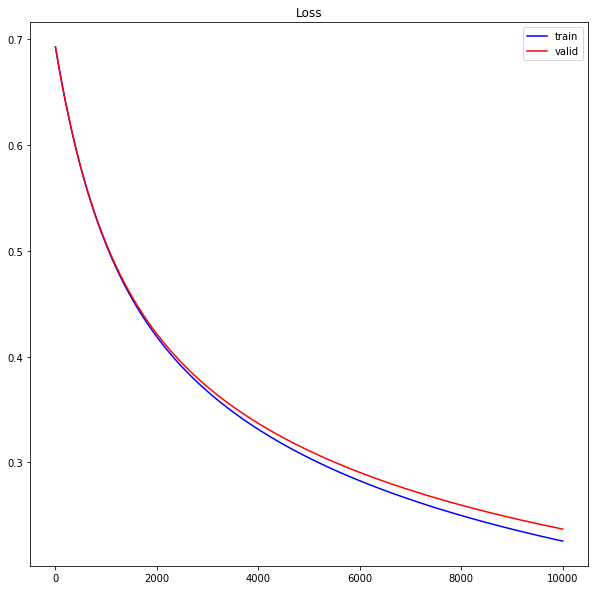

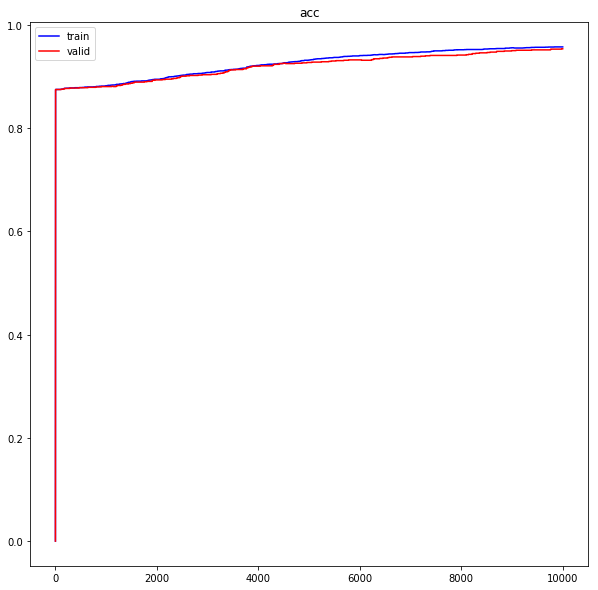

In [23]:
plt.figure(figsize=(10, 10))
xs = list(range(len(lr.loss_train)))
plt.plot(xs, lr.loss_train, label="train", color="b")
plt.plot(xs, lr.loss_valid, label="valid", color="r")
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
xs = list(range(len(lr.loss_train)))
plt.plot(xs, lr.acc_train, label="train", color="b")
plt.plot(xs, lr.acc_valid, label="valid", color="r")
plt.title("acc")
plt.legend()
plt.show()